In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
import matplotlib.pyplot as plt

In [2]:
time_series = pd.read_csv('time_series.csv').astype('float32')
time_series.head()

Year  Month  NumCases
0  1980.0    1.0    1825.0
1  1980.0    2.0    1730.0
2  1980.0    3.0    1743.0
3  1980.0    4.0    1760.0
4  1980.0    5.0    1863.0

In [3]:
for i in range(1, 13, 1):
    time_series[f'NumCases_{i}'] = time_series['NumCases'].shift(i)

In [4]:
time_series = time_series[12:]
time_series.head()

Year  Month  NumCases  NumCases_1  NumCases_2  NumCases_3  NumCases_4  \
12  1981.0    1.0    1987.0      1965.0      1861.0      1935.0      1869.0   
13  1981.0    2.0    1777.0      1987.0      1965.0      1861.0      1935.0   
14  1981.0    3.0    1910.0      1777.0      1987.0      1965.0      1861.0   
15  1981.0    4.0    1771.0      1910.0      1777.0      1987.0      1965.0   
16  1981.0    5.0    1860.0      1771.0      1910.0      1777.0      1987.0   

    NumCases_5  NumCases_6  NumCases_7  NumCases_8  NumCases_9  NumCases_10  \
12      2371.0      2179.0      1991.0      1863.0      1760.0       1743.0   
13      1869.0      2371.0      2179.0      1991.0      1863.0       1760.0   
14      1935.0      1869.0      2371.0      2179.0      1991.0       1863.0   
15      1861.0      1935.0      1869.0      2371.0      2179.0       1991.0   
16      1965.0      1861.0      1935.0      1869.0      2371.0       2179.0   

    NumCases_11  NumCases_12  
12       1730.0       1825.0  
13       1743.0       1730.0  
14       1760.0       1743.0  
15       1863.0       1760.0  
16       1991.0       1863.0

In [5]:
train = time_series[:-60]
test = time_series[-60:]

In [6]:
X_train = train[train.columns[3:]].to_numpy()
Y_train = train['NumCases'].to_numpy()

In [7]:
elasticNetCV = sklearn.linear_model.ElasticNetCV(
    l1_ratio=[.01, .1, .5, .7, .9, .95, .99, .999, 1],
    n_alphas=1000,
    max_iter=10000,
    cv=sklearn.model_selection.TimeSeriesSplit(n_splits=3),
    verbose=3,
    n_jobs=-1,
    random_state=0
)

elasticNetCV.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 1801.24169921875, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 1801.24169921875, 

(array([1.2933075e-03, 3.9089005e-04, 1.7996380e-04, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 7.4540338e-05, 1.4159732e-03],
      dtype=float32), 0.44959285855293274, 1801.24169921875, 3)(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([0.03214667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04015096], dtype=float32), -0.37261882424354553, 1801.24169921875, 6)
(array([0.01885675, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.     

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([0.07507994, 0.00039417, 0.        , 0.        , 0.        ,
       0.        , 0.        

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)

(array([0.00390358, 0.0027674 , 0.00250048, 0.00206173, 0.00196508,
       0.00106776, 0.00163068, 0.00137369, 0.00144831, 0.00160016,
       0.00237264, 0.00405785], dtype=float32), 0.11499707400798798, 1801.24169921875, 4)
(array([0.00398909, 0.00284491, 0.00257604, 0.0021342 , 0.00203673,
       0.00113314, 0.00169996, 0.00144127, 0.0015165 , 0.00166947,
       0.00244742, 0.00414439], dtype=float32), 0.23746395111083984, 1801.24169921875, 4)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0.,

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)(array([1.9319906e-03, 8.7553250e-05, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.9627248e-03],
      dtype=float32), -0.05889676883816719, 777.7401733398438, 3)
(array([0.12432124, 0.03383031, 0.02428593, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00551242, 0.14007762], dtype=float32), 34.94581604003906, 1801.24169921875, 8)
(array([0.00532687, 0.00405593, 0.0037558 , 0.00326494, 0.00315426,
       0.00215124, 0.0027798 , 0.00249434, 0.00257939, 0.00275021,
       0.00361505, 0.00549859], dtype=float32), 0.08538877964019775, 1801.24169921875, 4)(array([0.12534969, 0.03442308, 0.02494125, 0.        , 0.        ,
       0.        

(array([0.00677193, 0.00536006, 0.00502494, 0.00447957, 0.00435378,
       0.00324036, 0.00393737, 0.0036225 , 0.00371873, 0.00390955,
       0.0048711 , 0.00696176], dtype=float32), 0.6602630615234375, 1801.24169921875, 4)
(array([0.02277005, 0.00260662, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02306234], dtype=float32), 0.04644615575671196, 777.7401733398438, 4)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0

(array([0.00832932, 0.00676078, 0.00638646, 0.00578049, 0.00563738,
       0.00440139, 0.00517429, 0.00482712, 0.0049361 , 0.00514933,
       0.00621852, 0.00853911], dtype=float32), 1.0705761909484863, 1801.24169921875, 4)(array([0.03189207, 0.00967681, 0.00605143, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00320591, 0.0324413 ], dtype=float32), 0.48490646481513977, 777.7401733398438, 4)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)(array([4.9961102e-03, 2.6481820e-03, 2.1993469e-03, 1.2726438e-03,
       9.4289449e-04, 0.0000000e+00, 2.5299177e-04, 1.1909445e-04,
       9.2143455e-05, 3.2891874e-04, 1.9530865e-03, 5.0411928e-03],
      dtype=float32), -0.2843207120895386, 777.7401733398438, 3)
(array([0.15559922, 0.01095402, 0.00080979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.17046368], dtype=float32), 

(array([0.14006926, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.13525312], dtype=float32), 1.8780399560928345, 777.7401733398438, 5)
(array([0.04282553, 0.02739746, 0.02396015, 0.01825182, 0.01694401,
       0.00508681, 0.0128206 , 0.00943973, 0.01060889, 0.01245002,
       0.02260098, 0.04502362], dtype=float32), 11.767608642578125, 1801.24169921875, 6)(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0.08849798, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.08712266], dtype=float32), 0.24483896791934967, 777.7401733398438, 5)

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00094574], dtype=float32), -0.12286646664142609, 178.45880126953125,

(array([0.0515466 , 0.03384512, 0.02987748, 0.02336167, 0.02177501,
       0.00823976, 0.01708612, 0.01328551, 0.01469852, 0.0168094 ,
       0.02843321, 0.05404629], dtype=float32), 27.853960037231445, 1801.24169921875, 6)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0.16518638, 0.05340685, 0.04532734, 0.01096872, 0.00637354,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02389107, 0.18697299], dtype=float32), 137.5167694091797, 1801.24169921875, 9)(array([0.19454572, 0.031241  , 0.02761874, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.22009361], dtype=float32), 80.19039154052734, 1801.24169921875, 8)
(array([0.18023527, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.17295359], dtype=float32), 2.1122725009918213, 777.7401733398438, 5)
(arr



(array([0.13878772, 0.00405386, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.1362241 ], dtype=float32), 4.16774320602417, 777.7401733398438, 5)
(array([0.1400914 , 0.00496248, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.13768685], dtype=float32), 4.470215797424316, 777.7401733398438, 5)
(array([0.14138944, 0.0058654 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.13914381], dtype=float32), 4.462331771850586, 777.7401733398438, 5)
(array([0.0284096 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04957119], dtype=float32), 0.005101450718939304, 178.45880126953125, 4)

(array([0.00535192, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ,


(array([0.00395249, 0.00182397, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00078491, 0.00507332], dtype=float32), 0.029057953506708145, 178.45880126953125, 3)
(array([0.08640581, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.08850557], dtype=float32), 0.06395386904478073, 178.45880126953125, 4)
(array([0.03710058, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05952143], dtype=float32), 0.09095239639282227, 178.45880126953125, 4)
(array([0.01735293, 0.01476967, 0.01413552, 0.01313735, 0.01287162,
       0.01084549, 0.01210546, 0.01155752, 0.01175577, 0.01211755,
       0.01388624, 0.01768883], dtype=float32), 0.019823864102363586, 1801.24169921875, 4)
(array([0.19509189, 0.06350683, 0.057232  , 0.01818363, 0.01425012,
       0.        , 0.  

       0.        , 0.08847636], dtype=float32), 0.08743385225534439, 178.45880126953125, 4)(array([0.16963872, 0.02048833, 0.01845409, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.17255045], dtype=float32), 6.922792911529541, 777.7401733398438, 6)(array([0.02495584, 0.00544473, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03233034], dtype=float32), 0.005967976525425911, 178.45880126953125, 3)(array([0.07369029, 0.04893839, 0.04342827, 0.0344792 , 0.03210094,
       0.01342944, 0.02577978, 0.02063937, 0.02280528, 0.02565921,
       0.04173254, 0.07715774], dtype=float32), 91.02619171142578, 1801.24169921875, 6)(array([0.0844778 , 0.04402683, 0.03826788, 0.02330407, 0.01845487,
       0.        , 0.00970635, 0.00662673, 0.00605416, 0.00867161,
       0.03427285, 0.08577036], dtype=float32), 24.8983211517334, 777.7401733398438, 5)
(array([0.0058

(array([0.09819315, 0.05135151, 0.04499945, 0.02780392, 0.02226595,
       0.        , 0.01263087, 0.00887076, 0.0082438 , 0.01106925,
       0.04032608, 0.09960946], dtype=float32), 37.160064697265625, 777.7401733398438, 5)
(array([0.20013215, 0.03417512, 0.03795502, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.20893553], dtype=float32), 11.451783180236816, 777.7401733398438, 6)
(array([0.20101519, 0.034537  , 0.0385056 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.20999177], dtype=float32), 12.122060775756836, 777.7401733398438, 6)
(array([0.2646432 , 0.02633536, 0.05106096, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.27209535], dtype=float32), 30.34383201599121, 777.7401733398438, 6)
(array([0.09876949, 0.05164521, 0.04526968, 0.02797656, 0.02240958,
       0.        , 0.01273863, 0.

       0.00492055, 0.01121364], dtype=float32), 0.012340339832007885, 178.45880126953125, 4)(array([0.16983388, 0.03308356, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14248988], dtype=float32), 0.26777753233909607, 178.45880126953125, 5)(array([0.0941873 , 0.06111186, 0.0540063 , 0.04231633, 0.03918527,
       0.0145672 , 0.03117491, 0.02434319, 0.02737414, 0.03091111,
       0.05199721, 0.0988672 ], dtype=float32), 147.69544982910156, 1801.24169921875, 6)
(array([0.10687524, 0.0556534 , 0.04896501, 0.03026604, 0.02429306,
       0.        , 0.0141335 , 0.00989048, 0.00921858, 0.01213663,
       0.04382731, 0.10841864], dtype=float32), 44.83595657348633, 777.7401733398438, 5)
(array([0.2373988 , 0.07146391, 0.07052294, 0.0235091 , 0.01979885,
       0.        , 0.0052221 , 0.        , 0.        , 0.        ,
       0.03685601, 0.27282092], dtype=float32), 163.56846618652344, 1801.24169921875, 7)

(array([0



(array([0.10400023, 0.06629878, 0.05841822, 0.04526205, 0.0418053 ,
       0.01393097, 0.03296421, 0.02513104, 0.02862931, 0.03245386,
       0.05621295, 0.10938475], dtype=float32), 165.0164794921875, 1801.24169921875, 6)

(array([0.03397753, 0.0289422 , 0.02765745, 0.02571676, 0.02510982,
       0.02119503, 0.02361424, 0.0226188 , 0.02306322, 0.02379506,
       0.02725906, 0.03460538], dtype=float32), 6.260836601257324, 1801.24169921875, 4)
(array([0.12799306, 0.06500492, 0.05769777, 0.03505483, 0.02806067,
       0.        , 0.01680985, 0.0112009 , 0.01038154, 0.01335045,
       0.05129468, 0.13004145], dtype=float32), 65.49986267089844, 777.7401733398438, 5)(array([0.27162534, 0.05727952, 0.07028016, 0.01197707, 0.00387025,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00511672, 0.31887683], dtype=float32), 177.019775390625, 1801.24169921875, 7)(array([0.19210112, 0.07797956, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.      

       0.00781083, 0.01577177], dtype=float32), -0.04101711884140968, 178.45880126953125, 4)(array([0.21695678, 0.07632779, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.17618765], dtype=float32), 0.6099613308906555, 178.45880126953125, 5)

(array([0.07628969, 0.04547725, 0.0088143 , 0.        , 0.01200232,
       0.        , 0.00377211, 0.00094117, 0.        , 0.        ,
       0.01587916, 0.07876457], dtype=float32), 0.309405654668808, 178.45880126953125, 5)
(array([0.20777954, 0.09036712, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.17657699], dtype=float32), 0.99750155210495, 178.45880126953125, 4)(array([0.21774194, 0.07704571, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.17674176], dtype=float32), 0.49067264795303345, 178.45880126953125, 5)

(arra

       0.        , 0.32306194], dtype=float32), 36.507442474365234, 777.7401733398438, 5)(array([0.22823569, 0.08663513, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.1841252 ], dtype=float32), 0.47598329186439514, 178.45880126953125, 5)

(array([0.22613592, 0.10466615, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.18908788], dtype=float32), 1.1188784837722778, 178.45880126953125, 4)

(array([0.1577149 , 0.07543295, 0.06800407, 0.03913121, 0.03090553,
       0.        , 0.0187799 , 0.0106954 , 0.00958353, 0.01204076,
       0.05937513, 0.16104789], dtype=float32), 97.05891418457031, 777.7401733398438, 5)
(array([0.15831068, 0.07560867, 0.06818947, 0.03918351, 0.03093692,
       0.        , 0.01880383, 0.01066185, 0.00954357, 0.0119817 ,
       0.0595091 , 0.16167706], dtype=float32), 97.61731719970703, 777.7401733398438, 5)
(array([



(array([0.29534796, 0.05996583, 0.07973544, 0.01682877, 0.00927415,
       0.        , 0.00051637, 0.        , 0.        , 0.        ,
       0.00716265, 0.34861934], dtype=float32), 148.52481079101562, 1801.24169921875, 7)
(array([0.295695  , 0.05997674, 0.07985809, 0.01687752, 0.00931776,
       0.        , 0.00061832, 0.        , 0.        , 0.        ,
       0.00715544, 0.3490359 ], dtype=float32), 149.17022705078125, 1801.24169921875, 7)
(array([0.29604033, 0.05998832, 0.07997961, 0.01692582, 0.00936062,
       0.        , 0.00071872, 0.        , 0.        , 0.        ,
       0.00714786, 0.34945056], dtype=float32), 148.92544555664062, 1801.24169921875, 7)

(array([0.31417418, 0.04448088, 0.08935579, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33544198], dtype=float32), 21.319297790527344, 777.7401733398438, 4)
(array([0.12813932, 0.07728976, 0.06764898, 0.0505205 , 0.04650098,
       0.00953937, 0.0356933 , 0

       0.03723704, 0.04847897], dtype=float32), 26.261274337768555, 1801.24169921875, 4)(array([0.28838098, 0.0715176 , 0.08353903, 0.02498865, 0.02031961,
       0.        , 0.01053477, 0.        , 0.        , 0.        ,
       0.02907481, 0.33536762], dtype=float32), 131.85665893554688, 1801.24169921875, 6)
(array([0.29938003, 0.06008628, 0.08116383, 0.01738783, 0.00976563,
       0.        , 0.00169579, 0.        , 0.        , 0.        ,
       0.00706451, 0.3534539 ], dtype=float32), 134.8717803955078, 1801.24169921875, 6)
(array([0.31869647, 0.04584291, 0.09282   , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.34121358], dtype=float32), 18.57251739501953, 777.7401733398438, 4)
(array([0.12460235, 0.07799929, 0.02031737, 0.0061637 , 0.02369619,
       0.        , 0.00973222, 0.00527739, 0.        , 0.        ,
       0.02450003, 0.11772271], dtype=float32), 2.5954465866088867, 178.45880126953125, 5)

(array([0.3189

(array([0.05110535, 0.04249761, 0.04025637, 0.03696341, 0.03582012,
       0.02919171, 0.033289  , 0.03168049, 0.03251769, 0.03378409,
       0.03970197, 0.05215164], dtype=float32), 33.17826843261719, 1801.24169921875, 4)
(array([0.14725818, 0.08424855, 0.07355417, 0.05296385, 0.04888352,
       0.00371392, 0.03674074, 0.02256959, 0.02852015, 0.03281211,
       0.06983003, 0.15675685], dtype=float32), 281.43511962890625, 1801.24169921875, 6)
(array([0.29558852, 0.07065454, 0.08526576, 0.02489998, 0.01993147,
       0.        , 0.01115992, 0.        , 0.        , 0.        ,
       0.02682083, 0.3444223 ], dtype=float32), 116.37042236328125, 1801.24169921875, 6)(array([0.02873085, 0.02171354, 0.0136172 , 0.01064403, 0.01346814,
       0.00482869, 0.01121183, 0.01073728, 0.00724321, 0.00999916,
       0.01599939, 0.02994723], dtype=float32), 0.16013453900814056, 178.45880126953125, 4)


(array([0.1379407 , 0.08635915, 0.0220523 , 0.00737055, 0.02581769,
       0.        , 0.01044053, 0.

       0.        , 0.20692769], dtype=float32), 2.725600242614746, 178.45880126953125, 4)(array([0.05478777, 0.04524221, 0.04275286, 0.03910971, 0.03782497,
       0.03049031, 0.0350292 , 0.03326202, 0.03420499, 0.03560776,
       0.04216393, 0.05594498], dtype=float32), 43.89321517944336, 1801.24169921875, 4)
(array([0.29999787, 0.07002062, 0.08632094, 0.02481464, 0.0196453 ,
       0.        , 0.01154154, 0.        , 0.        , 0.        ,
       0.02532121, 0.34998128], dtype=float32), 123.30506896972656, 1801.24169921875, 5)
(array([0.29875094, 0.05742067, 0.08966449, 0.00925323, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01490666, 0.3191794 ], dtype=float32), 43.396785736083984, 777.7401733398438, 5)
(array([0.2991195 , 0.05744098, 0.08982828, 0.00931337, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01491848, 0.31959373], dtype=float32), 43.47047805786133, 777.7401733398438, 5)

(array([0.1549

(array([0.31570655, 0.05994892, 0.08683464, 0.01941113, 0.01141324,
       0.        , 0.00636026, 0.        , 0.        , 0.        ,
       0.00590878, 0.37313157], dtype=float32), 55.97932434082031, 1801.24169921875, 5)

(array([0.06038491, 0.04928548, 0.04638961, 0.04217077, 0.04065402,
       0.032154  , 0.037427  , 0.03539666, 0.03651569, 0.0381396 ,
       0.04574699, 0.06172787], dtype=float32), 60.02705764770508, 1801.24169921875, 4)

(array([0.30927497, 0.05781465, 0.09433621, 0.01086701, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01503945, 0.33105376], dtype=float32), 37.05052947998047, 777.7401733398438, 5)
(array([0.31593782, 0.05993982, 0.0869142 , 0.01943727, 0.0114327 ,
       0.        , 0.00642533, 0.        , 0.        , 0.        ,
       0.00588346, 0.37341243], dtype=float32), 57.3805046081543, 1801.24169921875, 5)

(array([0.3314288 , 0.04893851, 0.10068788, 0.00451621, 0.        ,
       0.        , 0.        , 0.    

(array([0.30874935, 0.06850594, 0.08841282, 0.02459479, 0.01894725,
       0.        , 0.01229062, 0.        , 0.        , 0.        ,
       0.02197618, 0.36109906], dtype=float32), 110.54920196533203, 1801.24169921875, 5)(array([0.17723703, 0.10955201, 0.0238857 , 0.00878816, 0.03003569,
       0.        , 0.01129367, 0.00359402, 0.        , 0.        ,
       0.02375115, 0.15760273], dtype=float32), 6.548245906829834, 178.45880126953125, 5)
(array([ 0.27658334,  0.13059773,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.21756639], dtype=float32), 2.438009738922119, 178.45880126953125, 4)
(array([ 0.27699   ,  0.13096611,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.2178437 ], dtype=float32), 2.4619157314300537, 178.45880126953125, 4)
(array([ 0.28668776,  0.14833063,  0.        ,  0.        ,  0.01322617,
    

(array([ 0.33915326,  0.05019569,  0.10483466,  0.00707468,  0.        ,
       -0.        ,  0.00167479,  0.        ,  0.        ,  0.        ,
        0.00428206,  0.36477494], dtype=float32), 40.55709457397461, 777.7401733398438, 4)(array([ 0.18744954,  0.11523011,  0.0235849 ,  0.00873078,  0.03070738,
       -0.        ,  0.01135494,  0.00277458,  0.        ,  0.        ,
        0.02250403,  0.16514738], dtype=float32), 7.358476638793945, 178.45880126953125, 5)
(array([0.04261573, 0.03221472, 0.02001186, 0.01569878, 0.0192865 ,
       0.00622395, 0.01550549, 0.01472063, 0.0095655 , 0.01361477,
       0.0224317 , 0.04295252], dtype=float32), 0.5021436810493469, 178.45880126953125, 4)(array([0.32413942, 0.05948464, 0.08972809, 0.02032105, 0.01205894,
       0.        , 0.00872157, 0.        , 0.        , 0.        ,
       0.00485737, 0.38336396], dtype=float32), 61.851016998291016, 1801.24169921875, 5)
(array([ 0.31949845,  0.05761217,  0.09865552,  0.01185373,  0.        ,
      

(array([ 0.23763673,  0.08671498,  0.08756157,  0.03775081,  0.02810643,
       -0.        ,  0.02000008,  0.        ,  0.        ,  0.        ,
        0.06636117,  0.24775524], dtype=float32), 82.07470703125, 777.7401733398438, 5)
(array([0.04677129, 0.03527744, 0.02173139, 0.0170079 , 0.0208173 ,
       0.00631036, 0.01653524, 0.01564582, 0.00994561, 0.01440212,
       0.02411105, 0.04673798], dtype=float32), 0.6594243049621582, 178.45880126953125, 4)
(array([0.19799744, 0.09448459, 0.08367705, 0.05237551, 0.04878755,
       0.        , 0.03507406, 0.00973618, 0.02001908, 0.02207799,
       0.07585058, 0.21598801], dtype=float32), 485.5560302734375, 1801.24169921875, 7)
(array([ 0.321029  ,  0.05751263,  0.09926272,  0.01191489,  0.        ,
       -0.        ,  0.00166896,  0.        ,  0.        ,  0.        ,
        0.01440057,  0.34395057], dtype=float32), 54.59833526611328, 777.7401733398438, 4)
(array([ 0.29736894,  0.15576753,  0.        ,  0.        ,  0.01730266,
       -0

(array([0.31896138, 0.06632376, 0.09087355, 0.0242556 , 0.01793752,
       0.        , 0.01317976, 0.        , 0.        , 0.        ,
       0.01754903, 0.37416366], dtype=float32), 63.14570999145508, 1801.24169921875, 4)
(array([ 0.21098575,  0.12776098,  0.02170609,  0.00811116,  0.03169329,
       -0.        ,  0.0114744 ,  0.00045921,  0.        ,  0.        ,
        0.01836162,  0.18239512], dtype=float32), 9.530749320983887, 178.45880126953125, 5)
(array([0.08248359, 0.06361736, 0.05880442, 0.05179434, 0.04920112,
       0.03495488, 0.04395936, 0.04057517, 0.04256673, 0.0451884 ,
       0.05791711, 0.08480304], dtype=float32), 64.361083984375, 1801.24169921875, 5)
(array([ 0.24613844,  0.08635583,  0.08914158,  0.03659187,  0.02655758,
       -0.        ,  0.0191357 ,  0.        ,  0.        ,  0.        ,
        0.06465492,  0.25696483], dtype=float32), 88.17869567871094, 777.7401733398438, 5)(array([0.05331301, 0.04002856, 0.02426621, 0.01889592, 0.02305526,
       0.0061689

(array([0.08925737, 0.06747126, 0.06199339, 0.05397025, 0.05101871,
       0.03464356, 0.04508181, 0.04116328, 0.04347458, 0.04642154,
       0.06101423, 0.09196493], dtype=float32), 80.25545501708984, 1801.24169921875, 5)
(array([0.08957239, 0.06764434, 0.06213507, 0.05406323, 0.05109492,
       0.03461668, 0.04512515, 0.04118017, 0.04350687, 0.04646889,
       0.06115134, 0.09229917], dtype=float32), 82.91537475585938, 1801.24169921875, 5)
(array([0.08988817, 0.06781738, 0.06227643, 0.05415555, 0.05117063,
       0.03458872, 0.04516771, 0.04119616, 0.04353835, 0.04651552,
       0.06128812, 0.09263425], dtype=float32), 82.59480285644531, 1801.24169921875, 5)
(array([0.06040288, 0.04508525, 0.02678466, 0.02072017, 0.02526699,
       0.00566259, 0.01924718, 0.01798149, 0.01032901, 0.01616725,
       0.02892371, 0.05886016], dtype=float32), 1.9867358207702637, 178.45880126953125, 4)
(array([ 0.2571522 ,  0.08546157,  0.09117052,  0.03492739,  0.02435804,
       -0.        ,  0.0180142 ,

(array([ 0.34962016,  0.05127469,  0.11023749,  0.01059807,  0.        ,
       -0.01106809,  0.01136656,  0.        ,  0.        , -0.        ,
        0.00729387,  0.37232828], dtype=float32), 168.7565155029297, 777.7401733398438, 5)

(array([ 0.33352217,  0.05636767,  0.10423107,  0.01222101,  0.        ,
       -0.        ,  0.00502283,  0.        ,  0.        ,  0.        ,
        0.01283542,  0.3572499 ], dtype=float32), 39.37818145751953, 777.7401733398438, 4)
(array([0.06987457, 0.05169944, 0.02979503, 0.02283003, 0.02792147,
       0.00447162, 0.02064425, 0.01908988, 0.00992562, 0.01675265,
       0.03170986, 0.06705093], dtype=float32), 3.297109603881836, 178.45880126953125, 4)
(array([0.10951012, 0.069742  , 0.06311721, 0.04795791, 0.04163948,
       0.0131403 , 0.03239387, 0.02936221, 0.02953378, 0.03304522,
       0.05884985, 0.10901109], dtype=float32), 63.81066131591797, 777.7401733398438, 4)

(array([0.0702419 , 0.05195283, 0.02990389, 0.02290484, 0.02801824,
       0.

(array([ 0.33883902,  0.05805543,  0.09474133,  0.02169788,  0.01284825,
       -0.        ,  0.01277437,  0.        ,  0.        ,  0.        ,
        0.00229647,  0.40120977], dtype=float32), 158.94728088378906, 1801.24169921875, 3)
(array([ 0.33892685,  0.05804421,  0.09477111,  0.02170557,  0.01285185,
       -0.        ,  0.01279864,  0.        ,  0.        ,  0.        ,
        0.00227792,  0.40131828], dtype=float32), 155.81309509277344, 1801.24169921875, 3)
(array([0.21984853, 0.09537378, 0.08654481, 0.04996155, 0.04714816,
       0.        , 0.03408135, 0.00235898, 0.01533132, 0.01500937,
       0.07550105, 0.24274528], dtype=float32), 581.5269165039062, 1801.24169921875, 7)
(array([ 0.3515071 ,  0.05147747,  0.11137664,  0.01176593,  0.00041656,
       -0.01859993,  0.01531188,  0.        , -0.        , -0.        ,
        0.00851141,  0.37226057], dtype=float32), 81.17115783691406, 777.7401733398438, 7)
(array([ 0.27286375,  0.08343171,  0.09420066,  0.03241001,  0.021334

(array([ 0.3050708 ,  0.15534358,  0.        ,  0.        ,  0.01364176,
       -0.00224862,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.23631458], dtype=float32), 5.20987606048584, 178.45880126953125, 6)(array([0.08221757, 0.06009357, 0.03314195, 0.02508214, 0.03095569,
       0.00214803, 0.02202659, 0.02006591, 0.0087293 , 0.01686398,
       0.03475367, 0.07748558], dtype=float32), 5.9119415283203125, 178.45880126953125, 4)
(array([ 0.28159365,  0.08234741,  0.09655148,  0.03159679,  0.02275312,
       -0.0125779 ,  0.01982983,  0.        ,  0.        ,  0.        ,
        0.05562117,  0.2938713 ], dtype=float32), 220.14166259765625, 777.7401733398438, 5)

(array([0.11118573, 0.07828166, 0.07057542, 0.05886261, 0.05480822,
       0.03046235, 0.04652667, 0.04041006, 0.04388589, 0.04781526,
       0.06919625, 0.11547416], dtype=float32), 144.05418395996094, 1801.24169921875, 5)
(array([ 2.62784272e-01,  1.53286964e-01,  1.10952845e-02,  1.11158472e-02,
 

        0.        ,  0.2385979 ], dtype=float32), 28.033340454101562, 178.45880126953125, 6)(array([ 0.2894421 ,  0.08111115,  0.09869377,  0.03074515,  0.02416406,
       -0.02264741,  0.02263521,  0.        ,  0.        ,  0.        ,
        0.0540914 ,  0.3007915 ], dtype=float32), 226.3572235107422, 777.7401733398438, 5)
(array([0.11595433, 0.08031605, 0.07213617, 0.05955341, 0.05529209,
       0.02901636, 0.04650457, 0.03980495, 0.04355519, 0.04766491,
       0.07064126, 0.12065356], dtype=float32), 174.67605590820312, 1801.24169921875, 5)(array([0.13548577, 0.07993755, 0.07206883, 0.05152308, 0.04385663,
       0.00489594, 0.03266985, 0.02767492, 0.02762774, 0.03147371,
       0.06612117, 0.1352449 ], dtype=float32), 127.55352020263672, 777.7401733398438, 4)
(array([ 0.34465596,  0.05547744,  0.10944572,  0.01380093,  0.00300019,
       -0.01872876,  0.01547843,  0.        ,  0.        , -0.        ,
        0.01417899,  0.3642672 ], dtype=float32), 74.13954162597656, 777.740173

        0.00880298,  0.39637968], dtype=float32), 31.279333114624023, 1801.24169921875, 3)(array([ 0.28048518,  0.1627696 ,  0.00247345,  0.01508155,  0.05005396,
       -0.05753748,  0.03227951,  0.0076971 , -0.01913881, -0.        ,
        0.01108088,  0.22157505], dtype=float32), 18.01580238342285, 178.45880126953125, 6)
(array([0.24238396, 0.09435882, 0.08864637, 0.04616291, 0.04442022,
       0.        , 0.032167  , 0.        , 0.00904555, 0.00604616,
       0.07285041, 0.27120033], dtype=float32), 530.4180908203125, 1801.24169921875, 7)
(array([0.2428439 , 0.0943187 , 0.08868292, 0.04607369, 0.04435501,
       0.        , 0.03212028, 0.        , 0.00890377, 0.00584906,
       0.07277276, 0.27179033], dtype=float32), 526.4641723632812, 1801.24169921875, 7)
(array([ 0.33448493,  0.17551076, -0.        ,  0.00941671,  0.05885531,
       -0.09947709,  0.05339047,  0.01156344, -0.04388555, -0.        ,
        0.        ,  0.24969535], dtype=float32), 19.90949249267578, 178.458801269

       0.03878582, 0.09638087], dtype=float32), 10.957208633422852, 178.45880126953125, 4)(array([ 0.33705595,  0.17707658, -0.        ,  0.01140596,  0.06201145,
       -0.10796985,  0.05728357,  0.01578672, -0.05045107, -0.        ,
        0.00061913,  0.25051516], dtype=float32), 19.783418655395508, 178.45880126953125, 6)
(array([ 0.34353966,  0.0574207 ,  0.09633701,  0.02208593,  0.01300998,
       -0.        ,  0.01405556, -0.        ,  0.        ,  0.        ,
        0.00127387,  0.4069327 ], dtype=float32), 191.58018493652344, 1801.24169921875, 2)(array([ 0.30158234,  0.07870957,  0.10207849,  0.02919507,  0.0266168 ,
       -0.03849878,  0.02743078,  0.        ,  0.        , -0.        ,
        0.05148732,  0.31113097], dtype=float32), 231.29637145996094, 777.7401733398438, 5)(array([0.16005547, 0.0870837 , 0.07873452, 0.05252334, 0.04384984,
       0.        , 0.03149685, 0.02414594, 0.02377252, 0.02736489,
       0.07090144, 0.16067341], dtype=float32), 69.10838317871094,

(array([ 0.17016026,  0.08926777,  0.08097682,  0.05225549,  0.0431455 ,
       -0.        ,  0.03055593,  0.02217884,  0.0216666 ,  0.02496969,
        0.07226012,  0.17141326], dtype=float32), 94.25146484375, 777.7401733398438, 5)

(array([ 0.36012492,  0.05116583,  0.11641166,  0.01202834,  0.01646754,
       -0.0591382 ,  0.03289489, -0.        , -0.        , -0.        ,
        0.01603916,  0.36966053], dtype=float32), 149.49905395507812, 777.7401733398438, 6)
(array([ 0.32706252,  0.16950084,  0.        ,  0.        ,  0.04484314,
       -0.06490065,  0.03364209,  0.        , -0.01890206, -0.        ,
        0.        ,  0.24533542], dtype=float32), 28.405929565429688, 178.45880126953125, 5)
(array([ 0.2928814 ,  0.16847833,  0.        ,  0.01708423,  0.05580807,
       -0.0744534 ,  0.03961095,  0.0134496 , -0.03223925, -0.        ,
        0.01287645,  0.22672848], dtype=float32), 42.099273681640625, 178.45880126953125, 5)
(array([0.13976349, 0.08894862, 0.07867178, 0.0614924

        0.00629254,  0.40453982], dtype=float32), 637.7191162109375, 1801.24169921875, 7)(array([ 0.31457478,  0.07547978,  0.10582349,  0.02720893,  0.0296257 ,
       -0.05579884,  0.0331822 ,  0.        , -0.        , -0.        ,
        0.04843786,  0.32165596], dtype=float32), 224.809814453125, 777.7401733398438, 5)
(array([ 0.12061878,  0.08459017,  0.03933826,  0.02835531,  0.03703649,
       -0.        ,  0.02318676,  0.02025126,  0.00103444,  0.01322766,
        0.0405177 ,  0.10908204], dtype=float32), 17.41292953491211, 178.45880126953125, 4)
(array([ 0.17894684,  0.09091578,  0.08286888,  0.05192302,  0.04264728,
       -0.0015715 ,  0.02999288,  0.02050939,  0.01984939,  0.02276257,
        0.073287  ,  0.18075076], dtype=float32), 171.3511199951172, 777.7401733398438, 6)
(array([ 0.33036447,  0.17122787,  0.        ,  0.00054199,  0.04903721,
       -0.07379147,  0.04017938,  0.        , -0.02451522, -0.        ,
        0.        ,  0.24712634], dtype=float32), 28.35717

(array([ 0.27746394,  0.08831712,  0.0906835 ,  0.03883214,  0.03734565,
       -0.        ,  0.02717637,  0.        ,  0.        ,  0.        ,
        0.06011382,  0.31640837], dtype=float32), 341.9957275390625, 1801.24169921875, 7)
(array([ 0.3511896 ,  0.05760973,  0.10209554,  0.0228823 ,  0.03569856,
       -0.05390019,  0.0384042 , -0.00433554, -0.        , -0.        ,
        0.01511338,  0.39738125], dtype=float32), 676.936279296875, 1801.24169921875, 6)

(array([ 0.30725268,  0.17433484,  0.        ,  0.01841459,  0.06300341,
       -0.09574492,  0.04875532,  0.0210281 , -0.047873  , -0.00165643,
        0.01590094,  0.23248939], dtype=float32), 28.28598976135254, 178.45880126953125, 6)(array([ 0.1864091 ,  0.09222376,  0.08456128,  0.05171913,  0.04264989,
       -0.00569699,  0.03005   ,  0.01929686,  0.01847234,  0.02092422,
        0.07413863,  0.18852212], dtype=float32), 206.5474395751953, 777.7401733398438, 6)(array([ 0.35283235,  0.0560578 ,  0.10131683,  0.02178353,

(array([ 0.32669577,  0.07204147,  0.10973802,  0.02435921,  0.03359353,
       -0.07148922,  0.03992185, -0.        , -0.        , -0.00611426,
        0.04808412,  0.33147505], dtype=float32), 191.61978149414062, 777.7401733398438, 5)(array([0.16458084, 0.09543615, 0.0837981 , 0.06149258, 0.05663839,
       0.00753067, 0.04368071, 0.02839557, 0.03531254, 0.03982791,
       0.08012517, 0.1747753 ], dtype=float32), 211.65972900390625, 1801.24169921875, 8)


(array([ 0.3555126 ,  0.05515272,  0.10457264,  0.02277529,  0.04128484,
       -0.06514564,  0.04746132, -0.01395409, -0.        , -0.        ,
        0.01830559,  0.397508  ], dtype=float32), 623.6470947265625, 1801.24169921875, 6)
(array([ 0.138686  ,  0.09540013,  0.04044952,  0.02849718,  0.03906143,
       -0.00378482,  0.02302137,  0.01935556,  0.        ,  0.009585  ,
        0.0414114 ,  0.12337104], dtype=float32), 12.71695327758789, 178.45880126953125, 5)(array([ 0.3652647 ,  0.05279556,  0.12122422,  0.00966082,  0.0341


(array([ 0.3679448 ,  0.05198558,  0.12298357,  0.00858937,  0.03848141,
       -0.09866715,  0.05617025, -0.00255426, -0.        , -0.02704741,
        0.0391839 ,  0.3670251 ], dtype=float32), 168.11239624023438, 777.7401733398438, 5)
(array([ 0.15138857,  0.10282659,  0.04071604,  0.02852488,  0.04086319,
       -0.01015857,  0.023409  ,  0.01889874, -0.        ,  0.00664565,
        0.04161965,  0.1330337 ], dtype=float32), 17.49419403076172, 178.45880126953125, 5)
(array([ 0.35878468,  0.0528894 ,  0.10508974,  0.0217723 ,  0.04001692,
       -0.06451108,  0.04711345, -0.01393684, -0.        , -0.        ,
        0.0148927 ,  0.4017808 ], dtype=float32), 629.8319702148438, 1801.24169921875, 6)(array([0.17255384, 0.09700985, 0.08518601, 0.06116787, 0.05657305,
       0.00325225, 0.0431979 , 0.02596777, 0.03349252, 0.03774102,
       0.08091482, 0.18384048], dtype=float32), 281.1783142089844, 1801.24169921875, 8)(array([ 0.35895878,  0.05328366,  0.10682654,  0.02202459,  0.046249


(array([ 0.22234528,  0.09565114,  0.09192777,  0.04911535,  0.04276063,
       -0.0269273 ,  0.03187777,  0.01302546,  0.01158164,  0.01048314,
        0.07647143,  0.2259977 ], dtype=float32), 192.34425354003906, 777.7401733398438, 7)(array([ 0.37226763,  0.04956085,  0.12502177,  0.00693836,  0.04116993,
       -0.10389404,  0.06096837, -0.00612742, -0.        , -0.03073615,
        0.04093261,  0.36950135], dtype=float32), 259.6580810546875, 777.7401733398438, 4)(array([ 0.37024158,  0.05097071,  0.12447335,  0.00785687,  0.04192302,
       -0.10417267,  0.06119915, -0.00652291, -0.        , -0.03102121,
        0.04274252,  0.36750507], dtype=float32), 262.8497619628906, 777.7401733398438, 4)(array([0.18154924, 0.09839903, 0.08650198, 0.06047349, 0.05616131,
       0.        , 0.04244106, 0.0229349 , 0.0312165 , 0.03505458,
       0.0814748 , 0.19425294], dtype=float32), 469.83160400390625, 1801.24169921875, 7)
(array([ 0.3403488 ,  0.17725012, -0.        ,  0.01067684,  0.062193

        0.02591787,  0.40130016], dtype=float32), 763.68310546875, 1801.24169921875, 5)(array([ 0.3530142 ,  0.1972212 , -0.03470139,  0.02641439,  0.08859641,
       -0.15363137,  0.07557844,  0.04486717, -0.08891945, -0.01097535,
        0.02666094,  0.24427731], dtype=float32), 76.10333251953125, 178.45880126953125, 4)(array([ 3.4266934e-01,  1.7911464e-01, -0.0000000e+00,  1.2666184e-02,
        6.6383310e-02, -1.1963370e-01,  6.2524535e-02,  2.0619746e-02,
       -5.9346613e-02, -3.2786053e-04,  3.7557622e-03,  2.5101870e-01],
      dtype=float32), 22.111377716064453, 178.45880126953125, 6)
(array([ 0.3740356 ,  0.04880876,  0.12628362,  0.00637751,  0.04436494,
       -0.10881165,  0.06548422, -0.00968886, -0.        , -0.03429096,
        0.04434166,  0.36960518], dtype=float32), 222.54946899414062, 777.7401733398438, 4)(array([ 0.18998452,  0.09922998,  0.08740203,  0.05938865,  0.05516814,
       -0.        ,  0.041237  ,  0.01965495,  0.02874837,  0.03210774,
        0.081573



(array([ 0.35460058,  0.19946963, -0.03939143,  0.02813581,  0.09120008,
       -0.1576419 ,  0.07720518,  0.04760829, -0.09243529, -0.01193629,
        0.02909835,  0.24355815], dtype=float32), 69.51628112792969, 178.45880126953125, 4)

(array([ 0.37583745,  0.04804197,  0.1275609 ,  0.00579661,  0.04759898,
       -0.11381058,  0.07007284, -0.01330652, -0.        , -0.03789051,
        0.04781668,  0.3697068 ], dtype=float32), 279.541748046875, 777.7401733398438, 3)

(array([ 0.24227485,  0.09543723,  0.09570426,  0.04657705,  0.04315227,
       -0.0394719 ,  0.03433547,  0.00927975,  0.00785781,  0.00372483,
        0.07659087,  0.24662156], dtype=float32), 299.2229309082031, 777.7401733398438, 7)
(array([ 0.1715105 ,  0.11426478,  0.03997133,  0.02820219,  0.04385983,
       -0.02098965,  0.02451764,  0.01857995, -0.00182668,  0.00174322,
        0.04149404,  0.14804779], dtype=float32), 40.77173614501953, 178.45880126953125, 5)
(array([ 0.33367902,  0.1898922 , -0.01856411,  0.0

(array([ 0.3765523 ,  0.04809372,  0.12859096,  0.0057614 ,  0.05146157,
       -0.11927389,  0.07505513, -0.01738288, -0.        , -0.04190604,
        0.05253369,  0.36869594], dtype=float32), 262.10589599609375, 777.7401733398438, 3)(array([ 0.20992456,  0.10039319,  0.08972559,  0.05696527,  0.05409509,
       -0.00711515,  0.04021434,  0.01238839,  0.0235974 ,  0.02510933,
        0.08140853,  0.22800575], dtype=float32), 999.6759643554688, 1801.24169921875, 10)(array([ 0.3248312 ,  0.07373571,  0.10008208,  0.03182229,  0.04834655,
       -0.06267094,  0.04653103, -0.00923328,  0.        , -0.        ,
        0.04389742,  0.36104363], dtype=float32), 707.8504638671875, 1801.24169921875, 6)
(array([ 0.3472364 ,  0.18620862, -0.01198892,  0.01761173,  0.07570896,
       -0.13471198,  0.0682435 ,  0.03094085, -0.07189562, -0.00544358,
        0.01346942,  0.24864228], dtype=float32), 32.431575775146484, 178.45880126953125, 6)(array([ 0.2549315 ,  0.0944586 ,  0.09804385,  0.0446201

        0.05388839,  0.36884528], dtype=float32), 245.50448608398438, 777.7401733398438, 3)(array([ 0.34989122,  0.19035988, -0.02062644,  0.02086729,  0.08053686,
       -0.14202692,  0.07117611,  0.03606921, -0.07837839, -0.00734262,
        0.01815686,  0.24719977], dtype=float32), 45.81201934814453, 178.45880126953125, 5)
(array([ 0.2661156 ,  0.09298568,  0.09995337,  0.04290709,  0.0437929 ,
       -0.0553425 ,  0.03859846,  0.00406371,  0.00245421, -0.        ,
        0.07438155,  0.2704437 ], dtype=float32), 474.0456237792969, 777.7401733398438, 5)(array([ 0.3413076 ,  0.19569334, -0.03057131,  0.02739991,  0.08777906,
       -0.14734477,  0.07129594,  0.0459506 , -0.08566904, -0.01464713,
        0.03175676,  0.24004894], dtype=float32), 91.7761459350586, 178.45880126953125, 4)(array([ 0.35307023,  0.06196188,  0.11990891,  0.01547454,  0.04607945,
       -0.1033594 ,  0.0608646 , -0.00799019, -0.        , -0.03109878,
        0.05480443,  0.351446  ], dtype=float32), 320.437

(array([ 0.2014895 ,  0.13057616,  0.03550518,  0.02788648,  0.04895562,
       -0.03883498,  0.02828578,  0.0200027 , -0.01444677,  0.        ,
        0.0402921 ,  0.1688415 ], dtype=float32), 38.467220306396484, 178.45880126953125, 5)(array([ 0.3339791 ,  0.06933907,  0.10320611,  0.02994327,  0.05278114,
       -0.07340504,  0.05480114, -0.01810726,  0.        , -0.00511435,
        0.04469478,  0.36849198], dtype=float32), 1040.743408203125, 1801.24169921875, 6)

(array([ 0.35850608,  0.20499322, -0.0509452 ,  0.03238601,  0.09760295,
       -0.16751428,  0.0812164 ,  0.05434412, -0.10110217, -0.01426055,
        0.03510138,  0.241758  ], dtype=float32), 95.32881164550781, 178.45880126953125, 3)
(array([ 0.37791157,  0.04745826,  0.12947762,  0.00528901,  0.0535207 ,
       -0.12251052,  0.07803299, -0.01970057, -0.        , -0.0442327 ,
        0.05463846,  0.36892644], dtype=float32), 235.6292266845703, 777.7401733398438, 3)(array([ 0.37312812,  0.04524555,  0.11608556,  0.01702

(array([ 0.3730898 ,  0.04556643,  0.11678895,  0.0170564 ,  0.06775799,
       -0.1073315 ,  0.08494445, -0.0456751 ,  0.        , -0.02836934,
        0.04394711,  0.3994474 ], dtype=float32), 986.9682006835938, 1801.24169921875, 4)
(array([ 0.2151972 ,  0.13771424,  0.03216204,  0.02776704,  0.0515225 ,
       -0.04775316,  0.03065975,  0.02100814, -0.02090517, -0.        ,
        0.03920707,  0.17766686], dtype=float32), 43.38736343383789, 178.45880126953125, 5)(array([ 0.3537961 ,  0.19647829, -0.03335595,  0.02564877,  0.08765189,
       -0.15280285,  0.07548181,  0.04363364, -0.08792488, -0.01011545,
        0.02506658,  0.24504828], dtype=float32), 76.55931854248047, 178.45880126953125, 4)(array([ 0.35918817,  0.20596859, -0.05297683,  0.0331285 ,  0.09873354,
       -0.1692496 ,  0.08191524,  0.05553379, -0.10262562, -0.01466715,
        0.03615937,  0.24143492], dtype=float32), 90.98023223876953, 178.45880126953125, 3)(array([ 0.3731458 ,  0.0455318 ,  0.11683046,  0.0170345

        0.02846765,  0.24397674], dtype=float32), 68.39802551269531, 178.45880126953125, 4)
(array([ 0.2507832 ,  0.09846658,  0.09464814,  0.05098729,  0.05528384,
       -0.03490261,  0.04375111,  0.        ,  0.01465114,  0.00951792,
        0.07861394,  0.27504212], dtype=float32), 1495.6268310546875, 1801.24169921875, 7)(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([ 2.2487637e-01,  1.4266299e-01,  2.9288907e-02,  2.7693607e-02,
        5.3488318e-02, -5.4324351e-02,  3.2615881e-02,  2.1961138e-02,
       -2.5608677e-02, -2.2451184e-04,  3.8416229e-02,  1.8370037e-01],
      dtype=float32), 22.17782974243164, 178.45880126953125, 6)(array([ 0.3749895 ,  0.04405801,  0.11868539,  0.01582289,  0.07048542,
       -0.11171988,  0.08867258, -0.04985463,  0.00324913, -0.03256096,
        0.04657675,  0.39923155], dtype=float32), 977.10400390625, 1801.24169921875, 3)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dty

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)(array([ 0.3800022 ,  0.04648172,  0.13083957,  0.0045673 ,  0.05667453,
       -0.12748776,  0.08261187, -0.02327367, -0.        , -0.04779974,
        0.05788523,  0.36927602], dtype=float32), 401.3494567871094, 777.7401733398438, 2)(array([ 0.26176605,  0.09692531,  0.09573256,  0.04874717,  0.05579753,
       -0.0430159 ,  0.0448994 , -0.        ,  0.01168904,  0.00458839,
        0.07692028,  0.28758654], dtype=float32), 1694.5347900390625, 1801.24169921875, 7)
(array([ 0.35730964,  0.20202507, -0.04487902,  0.02995839,  0.09410701,
       -0.16255058,  0.0793592 ,  0.05049923, -0.09656132, -0.01260896,
        0.03132575,  0.24307157], dtype=float32), 59.99029541015625, 178.45880126953125, 4)
(array([ 0.23374201,  0.14727116,  0.0263758 ,  0.02749175,  0.05556785,
       -0.06049654,  0.0345745 ,  0.02328329, -0.02958204, -0.00244846,
        0.03819145,  0.18940246], dtype=float32

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([ 0.38081667,  0.04609331,  0.13137162,  0.00427416,  0.05791176,
       -0.12942159,  0.0843953 , -0.02465396, -0.        , -0.0491873 ,
        0.05914588,  0.36940208], dtype=float32), 370.1582946777344, 777.7401733398438, 2)(array([ 0.31260097,  0.08161904,  0.11007156,  0.03101826,  0.04773166,
       -0.08802827,  0.05203572, -0.00333187, -0.        , -0.02094859,
        0.06975434,  0.31476268], dtype=float32), 743.7869262695312, 777.7401733398438, 5)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([ 0.37730992,  0.04221104,  0.120294  ,  0.01453757,  0.07232404,
       -0.11491324,  0.09150515, -0.05300808,  0.0055085

        0.03520283,  0.24184072], dtype=float32), 90.34445190429688, 178.45880126953125, 3)(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)(array([ 0.3687605 ,  0.05373139,  0.12672116,  0.00966791,  0.05488718,
       -0.12131233,  0.07680862, -0.01986113, -0.        , -0.04388804,
        0.06013997,  0.36125478], dtype=float32), 352.2806091308594, 777.7401733398438, 3)


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([ 0.25692016,  0.15914735,  0.0169165 ,  0.02715737,  0.06169207,
       -0.07771941,  0.04059003,  0.02754929, -0.04070015, -0.00796738,
        0.03764353,  0.20335981], dtype=float32), 38.478904724121094, 178.45880126953125, 6)
(array([ 0.3781819 ,  0.04146476,  0.12130345,  0.0138958 ,  0.07371699,
       -0.11712315,  0.0933653 , -0.05521346,  0.00741333, -0.03766407,
        0.04917997,  0.399689  ], dtype=float32), 1086.81396484375, 1801.24169921875, 2

(array([ 0.37851852,  0.04108504,  0.12237998,  0.01338072,  0.07545488,
       -0.11968143,  0.09542369, -0.05778882,  0.00992383, -0.04036646,
        0.05135369,  0.39869162], dtype=float32), 1160.476318359375, 1801.24169921875, 2)(array([ 0.26473898,  0.16311237,  0.01308586,  0.02715187,  0.06401074,
       -0.08390807,  0.04292509,  0.02926853, -0.04472513, -0.0096913 ,
        0.037513  ,  0.20770913], dtype=float32), 42.58456802368164, 178.45880126953125, 6)


(array([ 0.35831508,  0.05580268,  0.11303765,  0.02245161,  0.06682421,
       -0.10179056,  0.07910945, -0.04076079,  0.00134391, -0.02587362,
        0.05086266,  0.38605288], dtype=float32), 1126.951171875, 1801.24169921875, 4)

(array([ 0.37040937,  0.05280659,  0.12746105,  0.00900955,  0.05585805,
       -0.12320857,  0.07853605, -0.0211155 , -0.        , -0.04521639,
        0.06073508,  0.3621963 ], dtype=float32), 340.23052978515625, 777.7401733398438, 3)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], 

(array([ 0.3797373 ,  0.0401237 ,  0.12311313,  0.01274185,  0.076216  ,
       -0.12106771,  0.09668655, -0.05915183,  0.01081561, -0.04157894,
        0.05171099,  0.39920682], dtype=float32), 1486.1654052734375, 1801.24169921875, 2)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)(array([0.13882539, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.13280366], dtype=float32), 1.6539522409439087, 777.7401733398438, 6)
(array([0.11575941, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.13440648], dtype=float32), 8.326696395874023, 1801.24169921875, 8)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)


(array([ 0.3611528 ,  0.05382118,  0.11459487,  0.021172  ,  0.06856789,
       -0.1051914 ,  0.0820208 , -0.044

(array([ 0.3636026 ,  0.05207001,  0.11597002,  0.02003018,  0.07009995,
       -0.1081306 ,  0.0845595 , -0.04681595,  0.00510944, -0.03143104,
        0.05240632,  0.38885358], dtype=float32), 1347.2510986328125, 1801.24169921875, 3)(array([ 0.37996346,  0.03985922,  0.12389568,  0.01237001,  0.07748849,
       -0.12293422,  0.09818503, -0.06103103,  0.01265631, -0.0435549 ,
        0.05331272,  0.3984596 ], dtype=float32), 1700.4300537109375, 1801.24169921875, 3)
(array([0.14939232, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.16660447], dtype=float32), 22.30289077758789, 1801.24169921875, 7)(array([ 0.3740998 ,  0.05070172,  0.12912901,  0.00751055,  0.0580467 ,
       -0.12745798,  0.08243   , -0.02393717, -0.        , -0.04817496,
        0.06210122,  0.36425865], dtype=float32), 633.3553466796875, 777.7401733398438, 2)
(array([ 0.3799848 ,  0.03984572,  0.12391319,  0.01235867,  0.07751163

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0.19689716, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.21200496], dtype=float32), 25.98105239868164, 1801.24169921875, 7)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)

(array([0.08994146, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11191975], dtype=float32), 4.595529556274414, 1801.24169921875, 9)(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)(array([ 0.3104234 ,  0.08197585,  0.10336193,  0.03800041,  0.06192706,
       -0.07773464,  0.06075632, -0.02286905,  0.00612607, -0.01155767,
        0.06731527,  0.33917686], dtype=float32), 1228.84619140625, 1801.24169921875, 10)(array([0., 0., 0.,




(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)(array([0.24917129, 0.        , 0.00254679, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.23570459], dtype=float32), 2.542009115219116, 777.7401733398438, 5)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([0.00341893, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03264814], dtype=float32), -0.0027306973934173584, 1801.24169921875, 11)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0.,


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)

(array([0.01679194, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01920272], dtype=float32), -0.2369290590286255, 777.7401733398438, 8)
(array([0.06344616, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.08905444], dtype=float32), 3.8532063961029053, 1801.24169921875, 10)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0.

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0.27526754, 0.        , 0.03052943, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.26653352], dtype=float32), 4.11826753616333, 777.7401733398438, 5)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0.2760211 , 0.        , 0.0313388 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.26742578], dtype=float32), 4.34661865234375, 777.7401733398438, 5)(array([0.05389933, 0.        , 0.        , 0.    


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0.2499157, 0.       , 0.0019613, 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.2639118],
      dtype=float32), 13.0364351272583, 1801.24169921875, 8)(array([0.18796162, 0.02373597, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14780922], dtype=float32), 1.3147844076156616, 178.45880126953125, 5)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)
(array([0.14145516, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.13490

       0.        , 0.10760371], dtype=float32), 8.465415000915527, 1801.24169921875, 9)(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)(array([0.21033554, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.226954  ], dtype=float32), 43.79548263549805, 1801.24169921875, 7)
(array([0.0714107 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06984739], dtype=float32), 0.08798111975193024, 777.7401733398438, 7)
(array([0.0740759 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.07231021], dtype=float32), 0.37271997332572937, 777.7401733398438, 7)

(array([0.0170533 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
  

(array([0.05759282, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05708497], dtype=float32), 0.49842914938926697, 777.7401733398438, 7)
(array([0.12828621, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.12239927], dtype=float32), 2.340236186981201, 777.7401733398438, 6)
(array([0.24383172, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.25839022], dtype=float32), 43.92030334472656, 1801.24169921875, 7)(array([0.06034237, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05962806], dtype=float32), 0.4836605191230774, 777.7401733398438, 7)


(array([0.06307309, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.

(array([0.10915777, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.10476852], dtype=float32), 1.890293836593628, 777.7401733398438, 6)

(array([0.17222759, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19149916], dtype=float32), 21.831127166748047, 1801.24169921875, 8)(array([0.31327826, 0.02379752, 0.07203376, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3223471 ], dtype=float32), 27.327896118164062, 777.7401733398438, 5)
(array([0.26038277, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.27392024], dtype=float32), 44.329925537109375, 1801.24169921875, 7)


(array([0.01026748, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.

(array([0.2089212 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.22587572], dtype=float32), 24.156389236450195, 1801.24169921875, 8)

(array([0.28193057, 0.        , 0.02503479, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.30092698], dtype=float32), 30.56756591796875, 1801.24169921875, 8)

(array([0.14988579, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14242472], dtype=float32), 2.3275258541107178, 777.7401733398438, 6)

(array([0.319514  , 0.02801995, 0.07888103, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3317336 ], dtype=float32), 24.41541862487793, 777.7401733398438, 5)
(array([0.15200423, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.

       0.        , 0.31425783], dtype=float32), 12.325590133666992, 1801.24169921875, 8)(array([0.14209805, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11834195], dtype=float32), 0.28752848505973816, 178.45880126953125, 4)
(array([0.25194   , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.26615992], dtype=float32), 45.44436264038086, 1801.24169921875, 7)(array([0.15450138, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.12429407], dtype=float32), 0.20670519769191742, 178.45880126953125, 4)
(array([0.29957154, 0.02456086, 0.0566701 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33629552], dtype=float32), 61.88536071777344, 1801.24169921875, 7)(array([0.3150

(array([0.27425867, 0.        , 0.01268926, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.2905428 ], dtype=float32), 30.47571563720703, 1801.24169921875, 8)

(array([0.26833868, 0.11042492, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.20744388], dtype=float32), 4.215924263000488, 178.45880126953125, 4)(array([0.30769208, 0.03033358, 0.06570944, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3490874 ], dtype=float32), 62.22168731689453, 1801.24169921875, 7)(array([0.21849017, 0.04678081, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.16737205], dtype=float32), 1.8506851196289062, 178.45880126953125, 5)
(array([0.2645116, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0

       0.        , 0.35917303], dtype=float32), 58.278846740722656, 1801.24169921875, 7)(array([0.27677074, 0.11955145, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.21366996], dtype=float32), 3.8163936138153076, 178.45880126953125, 4)(array([0.27337596, 0.        , 0.01094482, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.25926045], dtype=float32), 9.73461627960205, 777.7401733398438, 5)(array([0.3078491 , 0.02123443, 0.05802439, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.34397873], dtype=float32), 83.00383758544922, 1801.24169921875, 7)



(array([0.20712696, 0.03840672, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.16021034], dtype=float32), 1.5445553064346313, 178.45880126953125, 5)(array([0.2352

(array([ 0.28417712,  0.12757233,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.2191337 ], dtype=float32), 3.568350315093994, 178.45880126953125, 4)
(array([0.3272804 , 0.0492614 , 0.08695208, 0.01314347, 0.00446639,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.38506505], dtype=float32), 100.70746612548828, 1801.24169921875, 6)(array([0.31953293, 0.03868063, 0.07880346, 0.00055145, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.36790666], dtype=float32), 61.99945831298828, 1801.24169921875, 7)
(array([0.29371625, 0.        , 0.03615179, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.28451636], dtype=float32), 10.582913398742676, 777.7401733398438, 5)
(array([ 0.28454083,  0.12796646,  0.        ,  0.        ,  0.        ,
       -0.        ,

       0.        , 0.17811643], dtype=float32), 1.7352073192596436, 178.45880126953125, 5)(array([0.3071638 , 0.00507206, 0.05330863, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3036753 ], dtype=float32), 30.077117919921875, 777.7401733398438, 6)(array([0.32495585, 0.04254762, 0.0829367 , 0.00633583, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3773401 ], dtype=float32), 148.51947021484375, 1801.24169921875, 6)
(array([0.31625578, 0.02865874, 0.06877259, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.35823944], dtype=float32), 77.59297180175781, 1801.24169921875, 7)
(array([ 0.29488117,  0.1391627 ,  0.        ,  0.        ,  0.00033985,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.22702067], dtype=float32), 0.24555298686027527, 178.45880126953125, 4)(

(array([ 0.29920813,  0.14368345,  0.        ,  0.        ,  0.00319066,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.23013948], dtype=float32), 0.1916358321905136, 178.45880126953125, 4)

(array([0.3217907 , 0.03354379, 0.0758532 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.36763528], dtype=float32), 71.58522033691406, 1801.24169921875, 7)
(array([0.32203403, 0.03375972, 0.07616583, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.36804944], dtype=float32), 69.80347442626953, 1801.24169921875, 7)
(array([0.2585171 , 0.09625251, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19896108], dtype=float32), 1.3127236366271973, 178.45880126953125, 5)
(array([0.30876392, 0.0197344 , 0.05722417, 0.        , 0.        ,
       0.        , 0.


(array([ 0.28471473,  0.12392475,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.21799763], dtype=float32), 4.186744213104248, 178.45880126953125, 4)(array([0.32392645, 0.03543003, 0.07858776, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.37126374], dtype=float32), 67.98088073730469, 1801.24169921875, 7)
(array([3.0025476e-01, 2.7986089e-04, 4.5550559e-02, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.9315847e-01],
      dtype=float32), 37.8985595703125, 777.7401733398438, 6)
(array([0.30068398, 0.00066222, 0.04610099, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.2938629 ], dtype=float32), 31.217525482177734, 777.7401733398438, 6)
(array([0.30110526, 0.00104376, 0.04664777, 0.    

        0.        ,  0.22596838], dtype=float32), 3.226318120956421, 178.45880126953125, 4)
(array([0.32494885, 0.02167807, 0.07684977, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3336868 ], dtype=float32), 17.119251251220703, 777.7401733398438, 5)

(array([0.32770425, 0.03888227, 0.0825516 , 0.00300424, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.37820873], dtype=float32), 76.02011108398438, 1801.24169921875, 7)
(array([0.31917152, 0.02941152, 0.07098001, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3621342 ], dtype=float32), 79.59447479248047, 1801.24169921875, 7)
(array([0.33726063, 0.05214978, 0.09198348, 0.01709055, 0.00817656,
       0.        , 0.00637689, 0.        , 0.        , 0.        ,
       0.        , 0.3980481 ], dtype=float32), 111.05516052246094, 1801.24169921875, 5)
(array([0.31


(array([0.3256448 , 0.03543052, 0.07953619, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.37332678], dtype=float32), 69.1898422241211, 1801.24169921875, 7)
(array([ 0.3082823 ,  0.15316676,  0.        ,  0.        ,  0.00915903,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.23667288], dtype=float32), -0.08457726985216141, 178.45880126953125, 4)(array([ 0.29987827,  0.1415759 ,  0.        ,  0.        ,  0.00086588,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.22958092], dtype=float32), 0.25694113969802856, 178.45880126953125, 4)
(array([0.32586202, 0.03563272, 0.07982372, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3737023 ], dtype=float32), 70.65635681152344, 1801.24169921875, 7)
(array([ 0.30844525,  0.1533371 ,  0.        ,  0.        ,  0.0092661 ,
   


(array([ 0.3123825 ,  0.15836723,  0.        ,  0.        ,  0.01803879,
       -0.01163251,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.23931077], dtype=float32), 6.202848434448242, 178.45880126953125, 6)(array([ 0.29159456,  0.13356209,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.22384956], dtype=float32), 3.4611425399780273, 178.45880126953125, 4)(array([0.32900155, 0.03870453, 0.08305926, 0.00313701, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.37964618], dtype=float32), 181.6143035888672, 1801.24169921875, 6)
(array([0.33976233, 0.05283406, 0.09321892, 0.01803921, 0.00904861,
       0.        , 0.00804683, 0.        , 0.        , 0.        ,
       0.        , 0.40122634], dtype=float32), 191.8668212890625, 1801.24169921875, 4)
(array([ 0.30304304,  0.14516169,  0.        ,  0.        ,  0.00321422,
       

(array([ 2.9692817e-01,  1.3958585e-01,  0.0000000e+00,  0.0000000e+00,
        2.8588361e-06, -0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
       -0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  2.2786094e-01],
      dtype=float32), 2.5548293590545654, 178.45880126953125, 4)(array([ 0.34320784,  0.04136077,  0.10306162,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.36607823], dtype=float32), 23.932018280029297, 777.7401733398438, 4)
(array([0.33644104, 0.04666254, 0.08978935, 0.01276968, 0.00426805,
       0.        , 0.00047177, 0.        , 0.        , 0.        ,
       0.        , 0.39470586], dtype=float32), 183.3485565185547, 1801.24169921875, 5)
(array([ 0.28572267,  0.12468976,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.21861959], dtype=float32), 4.106384754180908, 178.45880126953125, 4)(array([0.33844212, 0.034

        0.        ,  0.24393013], dtype=float32), 13.955371856689453, 178.45880126953125, 6)(array([ 0.34516513,  0.042923  ,  0.10526717,  0.00061971,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.36930153], dtype=float32), 24.84898567199707, 777.7401733398438, 4)(array([ 0.29595265,  0.13670057,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.22646841], dtype=float32), 3.28326678276062, 178.45880126953125, 4)(array([ 0.31272963,  0.15667222,  0.        ,  0.        ,  0.01431401,
       -0.0074294 ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.23901416], dtype=float32), 6.65764045715332, 178.45880126953125, 6)





(array([0.339783  , 0.05074773, 0.09251554, 0.01646448, 0.00762182,
       0.        , 0.00595646, 0.        , 0.        , 0.        ,
       0.        , 0.4003888 ], dtype=float32), 120.8307647705

(array([ 0.34460708,  0.05411109,  0.09559704,  0.01986075,  0.01072382,
       -0.        ,  0.01127877,  0.        ,  0.        ,  0.        ,
        0.        ,  0.40741158], dtype=float32), 208.9091339111328, 1801.24169921875, 3)
(array([0.34137556, 0.05143695, 0.09338544, 0.01725884, 0.00834935,
       0.        , 0.00727748, 0.        , 0.        , 0.        ,
       0.        , 0.40250152], dtype=float32), 209.0459442138672, 1801.24169921875, 4)
(array([0.3372478 , 0.04650249, 0.09006594, 0.01279225, 0.00429754,
       0.        , 0.00063786, 0.        , 0.        , 0.        ,
       0.        , 0.39556962], dtype=float32), 184.68357849121094, 1801.24169921875, 5)(array([ 0.34456742,  0.03997339,  0.10280482,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.36677864], dtype=float32), 26.45401382446289, 777.7401733398438, 4)
(array([ 0.3030527 ,  0.14492053,  0.        ,  0.        ,  0.00297395,
       -0.

(array([ 0.32305986,  0.16439722,  0.        ,  0.        ,  0.03210815,
       -0.04244672,  0.01607911,  0.        , -0.00468474, -0.        ,
        0.        ,  0.24209122], dtype=float32), 15.596667289733887, 178.45880126953125, 6)
(array([0.3432485 , 0.05074385, 0.09391861, 0.017071  , 0.00819103,
       0.        , 0.00734428, 0.        , 0.        , 0.        ,
       0.        , 0.40438387], dtype=float32), 222.01760864257812, 1801.24169921875, 4)
(array([0.33656305, 0.0331879 , 0.09275551, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3537058 ], dtype=float32), 15.123682975769043, 777.7401733398438, 5)(array([ 0.33327094,  0.17137425,  0.        ,  0.        ,  0.049033  ,
       -0.07515038,  0.04076822,  0.        , -0.02527465, -0.        ,
        0.        ,  0.24806063], dtype=float32), 27.389524459838867, 178.45880126953125, 5)(array([0.33906308, 0.0476693 , 0.09119377, 0.01400247, 0.00539986,
       0.



(array([ 0.3478541 ,  0.04311571,  0.10676412,  0.00141203,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.37255087], dtype=float32), 25.224681854248047, 777.7401733398438, 4)
(array([ 0.34793252,  0.04319508,  0.10683648,  0.00151621,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.37269896], dtype=float32), 25.798118591308594, 777.7401733398438, 4)
(array([ 0.33678994,  0.17300855,  0.        ,  0.00372366,  0.05354629,
       -0.08727265,  0.04826529,  0.00262766, -0.03355103, -0.        ,
        0.        ,  0.24985056], dtype=float32), 26.054630279541016, 178.45880126953125, 6)(array([0.3442168 , 0.05132306, 0.09450665, 0.01768684, 0.00875408,
       0.        , 0.00832934, 0.        , 0.        , 0.        ,
       0.        , 0.40577498], dtype=float32), 192.5719451904297, 1801.24169921875, 4)
(array([ 0.36330408,  0.04939609,  0.11748054,  0.01108956,  0.0



(array([ 0.36601365,  0.04952497,  0.1195081 ,  0.01002252,  0.02312426,
       -0.07414111,  0.04080692, -0.        , -0.        , -0.00710894,
        0.02055782,  0.37165067], dtype=float32), 91.4384536743164, 777.7401733398438, 6)

(array([ 0.34552687,  0.05322706,  0.09568179,  0.01936621,  0.01027852,
       -0.        ,  0.01078288,  0.        ,  0.        ,  0.        ,
        0.        ,  0.40814435], dtype=float32), 141.77447509765625, 1801.24169921875, 4)
(array([ 0.33970675,  0.17532076, -0.        ,  0.00718294,  0.05826069,
       -0.09988784,  0.0540769 ,  0.00936163, -0.0432552 , -0.        ,
        0.        ,  0.25126213], dtype=float32), 23.13294219970703, 178.45880126953125, 6)(array([ 0.34696972,  0.05472073,  0.09676358,  0.02075026,  0.01153975,
       -0.        ,  0.01286435, -0.        ,  0.        ,  0.        ,
        0.        ,  0.41045544], dtype=float32), 157.1888885498047, 1801.24169921875, 3)
(array([ 0.30800638,  0.15171307,  0.        ,  0.     

(array([ 0.3505863 ,  0.04527636,  0.10880069,  0.00409669,  0.        ,
       -0.        ,  0.00202174,  0.        ,  0.        ,  0.        ,
        0.        ,  0.37672392], dtype=float32), 21.969539642333984, 777.7401733398438, 4)(array([0.34321004, 0.05033667, 0.09377678, 0.01677166, 0.00792236,
       0.        , 0.00694412, 0.        , 0.        , 0.        ,
       0.        , 0.40420914], dtype=float32), 117.01649475097656, 1801.24169921875, 5)
(array([ 0.36761668,  0.04959293,  0.12078164,  0.00908743,  0.02717342,
       -0.08123205,  0.0449717 , -0.        , -0.        , -0.01291831,
        0.02498355,  0.37138042], dtype=float32), 83.37642669677734, 777.7401733398438, 6)
(array([ 0.3373055 ,  0.17275923,  0.        ,  0.00307028,  0.05300895,
       -0.08613919,  0.04782664,  0.00165275, -0.03254357, -0.        ,
        0.        ,  0.24995723], dtype=float32), 26.566213607788086, 178.45880126953125, 6)


(array([ 0.35526198,  0.04815856,  0.11211418,  0.00887929,  0. 

(array([ 0.3391405 ,  0.17427614, -0.        ,  0.00537112,  0.05611453,
       -0.09441861,  0.05163249,  0.00610979, -0.03892161, -0.        ,
        0.        ,  0.25085506], dtype=float32), 25.102336883544922, 178.45880126953125, 6)(array([ 0.32622978,  0.16630912,  0.        ,  0.        ,  0.03672665,
       -0.05159593,  0.0229236 ,  0.        , -0.01043203, -0.        ,
        0.        ,  0.24384561], dtype=float32), 14.326397895812988, 178.45880126953125, 6)
(array([ 0.34327757,  0.17816137, -0.        ,  0.01137784,  0.06412045,
       -0.11541798,  0.06117631,  0.01763646, -0.0552856 , -0.        ,
        0.00049079,  0.25270802], dtype=float32), 25.86594581604004, 178.45880126953125, 6)(array([ 0.35165498,  0.04599496,  0.10949817,  0.00494344,  0.        ,
       -0.        ,  0.00321427,  0.        ,  0.        , -0.        ,
        0.        ,  0.37814456], dtype=float32), 19.267230987548828, 777.7401733398438, 4)
(array([ 0.3584273 ,  0.04869618,  0.1141715 ,  0.01




(array([ 3.4862199e-01,  4.4238608e-02,  1.0759547e-01,  2.8109131e-03,
        0.0000000e+00, -0.0000000e+00,  1.1401538e-04,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  3.7423766e-01],
      dtype=float32), 27.624561309814453, 777.7401733398438, 4)


(array([ 0.33035162,  0.16889524,  0.        ,  0.        ,  0.04297322,
       -0.06387629,  0.03214311,  0.        , -0.01815816, -0.        ,
        0.        ,  0.24616353], dtype=float32), 30.655141830444336, 178.45880126953125, 5)(array([ 0.34089878,  0.17572978, -0.        ,  0.0075762 ,  0.05909097,
       -0.10235359,  0.05528009,  0.01038153, -0.04503409, -0.        ,
        0.        ,  0.25171536], dtype=float32), 22.831172943115234, 178.45880126953125, 6)(array([ 0.3617031 ,  0.04892127,  0.11627457,  0.01075234,  0.01126771,
       -0.04919487,  0.0286525 , -0.        , -0.        , -0.        ,
        0.0111676 ,  0.37437588], dtype=float32), 168.1994171142578, 777.7401733398438, 6)

(arra


(array([ 0.3642487 ,  0.04908909,  0.11791043,  0.01094155,  0.01728971,
       -0.06372017,  0.03498447, -0.        , -0.        , -0.        ,
        0.01436284,  0.3726993 ], dtype=float32), 147.85504150390625, 777.7401733398438, 6)
(array([ 3.3510190e-01,  1.7181167e-01,  0.0000000e+00,  2.5444635e-04,
        5.0115392e-02, -7.8110531e-02,  4.2801719e-02,  0.0000000e+00,
       -2.7095072e-02, -0.0000000e+00,  0.0000000e+00,  2.4883081e-01],
      dtype=float32), 28.51432991027832, 178.45880126953125, 5)
(array([ 0.35004652,  0.04516405,  0.10851435,  0.00390728,  0.        ,
       -0.        ,  0.00166953,  0.        ,  0.        ,  0.        ,
        0.        ,  0.3761157 ], dtype=float32), 22.37539291381836, 777.7401733398438, 4)
(array([ 0.3263231 ,  0.16673967,  0.        ,  0.        ,  0.03784404,
       -0.05342001,  0.02439644,  0.        , -0.01158196, -0.        ,
        0.        ,  0.24403688], dtype=float32), 14.094819068908691, 178.45880126953125, 6)
(array([ 

        0.        ,  0.37759957], dtype=float32), 20.967737197875977, 777.7401733398438, 4)(array([ 0.34980017,  0.18842052, -0.01678885,  0.01919535,  0.07821003,
       -0.13906255,  0.07021908,  0.0334006 , -0.07550143, -0.00604465,
        0.01528614,  0.2483859 ], dtype=float32), 32.032859802246094, 178.45880126953125, 6)
(array([ 0.35736766,  0.05344871,  0.10311458,  0.02114722,  0.03342156,
       -0.05306842,  0.03794565, -0.00467812, -0.        , -0.        ,
        0.00875474,  0.40556923], dtype=float32), 703.31201171875, 1801.24169921875, 6)
(array([ 0.36638957,  0.04923154,  0.11958939,  0.00989664,  0.02283095,
       -0.07386263,  0.04065947, -0.        , -0.        , -0.00687083,
        0.02003288,  0.37211546], dtype=float32), 92.33443450927734, 777.7401733398438, 6)(array([ 0.3486356 ,  0.05396707,  0.09718865,  0.02048394,  0.01130469,
       -0.        ,  0.01280103, -0.        ,  0.        , -0.        ,
        0.        ,  0.41208056], dtype=float32), 158.6194

(array([ 0.35219932,  0.192451  , -0.02515362,  0.0223789 ,  0.08291098,
       -0.14609717,  0.07299919,  0.03842457, -0.0817794 , -0.00791851,
        0.01994498,  0.24687532], dtype=float32), 46.013553619384766, 178.45880126953125, 5)
(array([ 0.33404386,  0.17151019,  0.        ,  0.        ,  0.04933658,
       -0.07608619,  0.04138197,  0.        , -0.02584328, -0.        ,
        0.        ,  0.24835762], dtype=float32), 27.416357040405273, 178.45880126953125, 5)

(array([ 0.34750062,  0.05308504,  0.0964281 ,  0.01960679,  0.01050597,
       -0.        ,  0.01144013,  0.        ,  0.        ,  0.        ,
        0.        ,  0.41035047], dtype=float32), 216.9873809814453, 1801.24169921875, 3)

(array([ 0.35229048,  0.1926056 , -0.02547364,  0.02250025,  0.08309162,
       -0.14636682,  0.07310483,  0.03861783, -0.08201949, -0.00799101,
        0.02012386,  0.24681757], dtype=float32), 45.55434036254883, 178.45880126953125, 5)
(array([ 0.35238144,  0.19275942, -0.02579198,  0.

(array([ 0.35461277,  0.1965323 , -0.03360799,  0.02557764,  0.08767164,
       -0.1532057 ,  0.0757934 ,  0.04351845, -0.08811595, -0.00981458,
        0.02465746,  0.24534103], dtype=float32), 40.9088020324707, 178.45880126953125, 5)(array([ 0.37047476,  0.04948144,  0.12288993,  0.00748289,  0.03346676,
       -0.09243672,  0.05156799, -0.        , -0.        , -0.02208241,
        0.03173107,  0.3712668 ], dtype=float32), 155.14012145996094, 777.7401733398438, 5)

(array([ 0.34810844,  0.05347561,  0.09680652,  0.02001409,  0.01087718,
       -0.        ,  0.01208676, -0.        ,  0.        ,  0.        ,
        0.        ,  0.41123876], dtype=float32), 188.5467529296875, 1801.24169921875, 3)



(array([ 0.34702218,  0.18293943, -0.00552764,  0.01484772,  0.07179201,
       -0.12970589,  0.06664171,  0.02645633, -0.0670611 , -0.00334234,
        0.00869237,  0.25065285], dtype=float32), 35.70348358154297, 178.45880126953125, 6)
(array([ 0.37054956,  0.04948642,  0.12295022,  0.00

(array([ 0.37233666,  0.04907402,  0.1243641 ,  0.00670716,  0.03774745,
       -0.0993119 ,  0.05679803, -0.00266681, -0.        , -0.02737444,
        0.03642685,  0.3710429 ], dtype=float32), 156.57412719726562, 777.7401733398438, 5)(array([ 0.343603  ,  0.17791958, -0.        ,  0.01089425,  0.06356557,
       -0.11432541,  0.06080536,  0.01679217, -0.05425543, -0.        ,
        0.        ,  0.25302902], dtype=float32), 30.216646194458008, 178.45880126953125, 5)

(array([ 0.35538784,  0.05388938,  0.10138626,  0.02093075,  0.02735401,
       -0.04047863,  0.03055343, -0.        , -0.        , -0.        ,
        0.00433865,  0.4083258 ], dtype=float32), 602.3648681640625, 1801.24169921875, 7)(array([ 0.36529365,  0.04908128,  0.10898066,  0.02001032,  0.04785652,
       -0.07798679,  0.058948  , -0.02456067, -0.        , -0.00689378,
        0.02122689,  0.40332112], dtype=float32), 688.23388671875, 1801.24169921875, 6)
(array([ 0.34863406,  0.05381344,  0.09713385,  0.02036566


(array([ 0.35792434,  0.05303113,  0.10311254,  0.02093523,  0.03279323,
       -0.05227256,  0.03734351, -0.00415417, -0.        , -0.        ,
        0.00769138,  0.40665847], dtype=float32), 515.4024047851562, 1801.24169921875, 7)


(array([ 0.37428114,  0.04830975,  0.12584375,  0.00610304,  0.04174361,
       -0.10538297,  0.06236446, -0.00707732, -0.        , -0.03175097,
        0.04084119,  0.37091392], dtype=float32), 249.75062561035156, 777.7401733398438, 4)(array([ 0.36819422,  0.04758962,  0.11140321,  0.0189128 ,  0.05357466,
       -0.08662291,  0.06665106, -0.03084804,  0.        , -0.01315084,
        0.02739931,  0.40280873], dtype=float32), 848.4105224609375, 1801.24169921875, 5)(array([ 0.3508932 ,  0.18965606, -0.01941405,  0.02012098,  0.07963011,
       -0.14135921,  0.07119739,  0.03485653, -0.07747175, -0.00648807,
        0.01650118,  0.2480799 ], dtype=float32), 30.891721725463867, 178.45880126953125, 6)(array([ 0.36337733,  0.04999937,  0.10714277,  0.02076

        0.02888794,  0.3717657 ], dtype=float32), 164.754638671875, 777.7401733398438, 5)
(array([ 0.36355218,  0.04876106,  0.11732839,  0.0107249 ,  0.01457716,
       -0.05748995,  0.03228109, -0.        , -0.        , -0.        ,
        0.01267012,  0.3738452 ], dtype=float32), 158.01580810546875, 777.7401733398438, 6)(array([ 0.35204625,  0.05401456,  0.09925586,  0.02098697,  0.01869422,
       -0.01926541,  0.02163826, -0.        ,  0.        , -0.        ,
        0.        ,  0.41161054], dtype=float32), 678.0350341796875, 1801.24169921875, 7)



(array([ 0.35840526,  0.20294192, -0.04688931,  0.03061068,  0.09514872,
       -0.16437209,  0.08018564,  0.05151211, -0.09807619, -0.01278528,
        0.03206171,  0.2429277 ], dtype=float32), 60.165443420410156, 178.45880126953125, 4)(array([ 0.34707287,  0.1829546 , -0.005567  ,  0.01485539,  0.0718071 ,
       -0.12974903,  0.06666787,  0.02646516, -0.06709045, -0.00333574,
        0.00868534,  0.2506667 ], dtype=float32), 35.9

(array([ 0.36258334,  0.05036487,  0.10634458,  0.02099082,  0.04108306,
       -0.06792721,  0.05006251, -0.01723884, -0.        , -0.        ,
        0.01361549,  0.40473214], dtype=float32), 607.0161743164062, 1801.24169921875, 6)
(array([ 0.35940492,  0.20462225, -0.05038014,  0.03193854,  0.09710821,
       -0.1673072 ,  0.0813437 ,  0.0536067 , -0.1006951 , -0.01356222,
        0.03400802,  0.24229485], dtype=float32), 92.8581314086914, 178.45880126953125, 3)

(array([ 0.35373083,  0.05393801,  0.10031006,  0.02097905,  0.02291057,
       -0.02967549,  0.02605203, -0.        , -0.        , -0.        ,
        0.00191559,  0.41015056], dtype=float32), 652.52587890625, 1801.24169921875, 7)

(array([ 0.349784  ,  0.18766695, -0.01531026,  0.01855714,  0.0773067 ,
       -0.13792436,  0.06986358,  0.03236045, -0.07439539, -0.00554345,
        0.01416811,  0.24885753], dtype=float32), 32.61238479614258, 178.45880126953125, 6)
(array([ 0.34989208,  0.18785585, -0.01569976,  0.0187050


(array([ 0.38097382,  0.045676  ,  0.13100593,  0.00402464,  0.05581953,
       -0.12662177,  0.08186908, -0.02250965, -0.        , -0.0470921 ,
        0.0563534 ,  0.37035027], dtype=float32), 265.39947509765625, 777.7401733398438, 2)(array([ 0.3675322 ,  0.04907845,  0.12035849,  0.00928465,  0.02492466,
       -0.07767255,  0.04290897, -0.        , -0.        , -0.00998251,
        0.02218986,  0.37225187], dtype=float32), 88.49137115478516, 777.7401733398438, 6)(array([ 0.35572731,  0.19799154, -0.03669009,  0.02670918,  0.0893605 ,
       -0.15585603,  0.07689212,  0.04527719, -0.09043422, -0.0103893 ,
        0.02620824,  0.24488689], dtype=float32), 72.567626953125, 178.45880126953125, 4)

(array([ 0.35209826,  0.19168523, -0.02362187,  0.02171578,  0.08199694,
       -0.14489819,  0.07259086,  0.03738789, -0.08062683, -0.00742475,
        0.01884406,  0.24731374], dtype=float32), 31.118183135986328, 178.45880126953125, 6)
(array([ 0.36026305,  0.20608751, -0.05340347,  0.0330

        0.02868354,  0.37172583], dtype=float32), 69.11559295654297, 777.7401733398438, 6)
(array([ 0.37453848,  0.04429447,  0.11671743,  0.01649399,  0.06612806,
       -0.10551006,  0.08351903, -0.04458792,  0.        , -0.02684783,
        0.0409008 ,  0.40165356], dtype=float32), 921.200439453125, 1801.24169921875, 4)


(array([ 0.37208638,  0.04552242,  0.11453655,  0.01744211,  0.06082372,
       -0.09760994,  0.07648167, -0.03887564,  0.        , -0.02109941,
        0.03507384,  0.40236235], dtype=float32), 923.682861328125, 1801.24169921875, 4)(array([ 0.351595  ,  0.19111738, -0.02241289,  0.02128903,  0.08134308,
       -0.14384082,  0.07214042,  0.03671854, -0.07971922, -0.00722488,
        0.01828479,  0.24745819], dtype=float32), 30.899234771728516, 178.45880126953125, 6)(array([ 0.3742247 ,  0.04826854,  0.12570196,  0.00609189,  0.04112377,
       -0.10453299,  0.06158742, -0.00644184, -0.        , -0.03112831,
        0.04005879,  0.37113523], dtype=float32), 251.3332

(array([ 0.35347375,  0.19432603, -0.02906284,  0.02382332,  0.0850877 ,
       -0.14942603,  0.07433917,  0.04072287, -0.08471082, -0.00872345,
        0.0220093 ,  0.24624062], dtype=float32), 42.86558532714844, 178.45880126953125, 5)(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)
(array([ 0.3621227 ,  0.05062116,  0.10599547,  0.02096866,  0.04013656,
       -0.06617598,  0.04864335, -0.01578709, -0.        , -0.        ,
        0.01289717,  0.40502378], dtype=float32), 615.6812133789062, 1801.24169921875, 6)
(array([ 0.37959194,  0.04619473,  0.12990549,  0.00444051,  0.05273782,
       -0.12199804,  0.07762393, -0.01914163, -0.        , -0.04374941,
        0.05291948,  0.37053877], dtype=float32), 232.826171875, 777.7401733398438, 3)
(array([ 3.75675648e-01,  4.37034480e-02,  1.17669314e-01,  1.60595197e-02,
        6.83725253e-02, -1.08895451e-01,  8.65428820e-02, -4.70547527e-02,
        2.46789969e-05, -2.93129198e-02,  4.3


(array([ 0.38270414,  0.04497515,  0.13231134,  0.00347368,  0.05931284,
       -0.1319116 ,  0.08672689, -0.02634477, -0.        , -0.05091178,
        0.06017138,  0.37025914], dtype=float32), 362.5249938964844, 777.7401733398438, 2)(array([ 0.37690526,  0.04721367,  0.12778015,  0.00526304,  0.04680464,
       -0.11308675,  0.06944565, -0.01266072, -0.        , -0.03731189,
        0.04631471,  0.37089163], dtype=float32), 211.47447204589844, 777.7401733398438, 4)
(array([ 0.3567759 ,  0.19978577, -0.04039649,  0.02810822,  0.09145309,
       -0.15897049,  0.07810908,  0.04751691, -0.09321187, -0.01122195,
        0.02828082,  0.24420682], dtype=float32), 66.7762222290039, 178.45880126953125, 4)

(array([ 0.35510108,  0.19709297, -0.03481026,  0.02601571,  0.08831733,
       -0.15425177,  0.07624277,  0.04417818, -0.0890242 , -0.01001463,
        0.02522618,  0.24519078], dtype=float32), 74.03936767578125, 178.45880126953125, 4)

(array([ 0.38272116,  0.04497086,  0.13231967,  0.00

(array([ 0.3568714 ,  0.20014086, -0.0411089 ,  0.02839951,  0.09187311,
       -0.15954196,  0.07831053,  0.04798654, -0.09374455, -0.01143527,
        0.02875667,  0.24403015], dtype=float32), 66.31661224365234, 178.45880126953125, 4)(array([ 0.36702064,  0.04806822,  0.11006691,  0.01939411,  0.0500013 ,
       -0.08144981,  0.06208341, -0.02717287, -0.        , -0.00936052,
        0.02318698,  0.40376472], dtype=float32), 761.4610595703125, 1801.24169921875, 5)(array([ 0.37750807,  0.042122  ,  0.11993974,  0.01462663,  0.07162407,
       -0.11397243,  0.09079074, -0.05205031,  0.00443008, -0.034397  ,
        0.04669381,  0.40066734], dtype=float32), 895.0065307617188, 1801.24169921875, 3)

(array([ 0.37242156,  0.04531249,  0.1147253 ,  0.01731571,  0.06116518,
       -0.09816951,  0.07699601, -0.03930046,  0.        , -0.02149237,
        0.03534678,  0.40247998], dtype=float32), 913.1954956054688, 1801.24169921875, 4)(array([ 0.35810858,  0.20211564, -0.04520412,  0.02992842, 

[Parallel(n_jobs=-1)]: Done  14 out of  27 | elapsed:   21.0s remaining:   19.5s


(array([ 0.36957046,  0.04676195,  0.11225615,  0.01841076,  0.05523847,
       -0.08928917,  0.06907784, -0.03285817,  0.        , -0.01505179,
        0.0288729 ,  0.40317592], dtype=float32), 755.0587768554688, 1801.24169921875, 5)
(array([ 0.36039686,  0.20610559, -0.05346369,  0.0330731 ,  0.09883133,
       -0.16992909,  0.08238973,  0.05542702, -0.10300728, -0.01418992,
        0.03564398,  0.24177735], dtype=float32), 84.2181396484375, 178.45880126953125, 3)(array([ 0.37611794,  0.04753106,  0.12718354,  0.00550797,  0.0452131 ,
       -0.11067583,  0.06723138, -0.0109088 , -0.        , -0.03556944,
        0.0445762 ,  0.37093025], dtype=float32), 207.24746704101562, 777.7401733398438, 4)
(array([ 0.3578266 ,  0.20178947, -0.04451296,  0.02968577,  0.09379652,
       -0.1624008 ,  0.07942627,  0.05004636, -0.09629533, -0.01220468,
        0.03066605,  0.24340303], dtype=float32), 60.21193313598633, 178.45880126953125, 4)(array([ 0.37944165,  0.04621756,  0.12973613,  0.0044686

(array([ 0.3785356 ,  0.0412236 ,  0.12121723,  0.01382819,  0.07341518,
       -0.11677405,  0.09314233, -0.05485246,  0.00689043, -0.03720003,
        0.04856284,  0.40023363], dtype=float32), 973.5830688476562, 1801.24169921875, 2)

(array([ 0.38016328,  0.04593145,  0.13029398,  0.00423973,  0.05367858,
       -0.12345376,  0.0789661 , -0.02018639, -0.        , -0.04479489,
        0.05390068,  0.3705953 ], dtype=float32), 218.8396453857422, 777.7401733398438, 3)
(array([ 0.37745574,  0.04218597,  0.11975017,  0.01471872,  0.07131714,
       -0.11352611,  0.09043143, -0.05160046,  0.00398728, -0.03392422,
        0.04630554,  0.4008539 ], dtype=float32), 895.9532470703125, 1801.24169921875, 3)(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)(array([ 0.36083522,  0.20687206, -0.0550429 ,  0.03366939,  0.09972541,
       -0.17125401,  0.08290449,  0.05638558, -0.10419028, -0.01454942,
        0.03653323,  0.2414836 ], dtype=float32), 

        0.04817402,  0.40040243], dtype=float32), 843.5302124023438, 1801.24169921875, 3)



(array([ 0.3806618 ,  0.04573889,  0.13067958,  0.00409009,  0.05472985,
       -0.12504432,  0.08042435, -0.02134568, -0.        , -0.04594398,
        0.05506406,  0.37055218], dtype=float32), 268.6852722167969, 777.7401733398438, 3)(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 777.7401733398438, 1)

(array([ 0.37849256,  0.04127273,  0.12106034,  0.01390239,  0.07316069,
       -0.11639776,  0.0928417 , -0.05447369,  0.00651724, -0.0368007 ,
        0.0482353 ,  0.4003886 ], dtype=float32), 906.47314453125, 1801.24169921875, 2)
(array([ 0.37310284,  0.04495269,  0.11528998,  0.01704976,  0.06249401,
       -0.10016313,  0.07877932, -0.04074768,  0.        , -0.02293853,
        0.03676583,  0.40236214], dtype=float32), 874.190673828125, 1801.24169921875, 4)(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 0.0, 178.45880126953125, 1)


(a

(array([0.03128289, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05954378], dtype=float32), 1.75, 1801.24169921875, 10)(array([ 0.38140732,  0.04545006,  0.13125436,  0.00386252,  0.05629765,
       -0.12742095,  0.08260573, -0.02307628, -0.        , -0.04765503,
        0.05680597,  0.37048662], dtype=float32), 385.6066589355469, 777.7401733398438, 2)
(array([ 0.38282025,  0.044908  ,  0.13237198,  0.00342514,  0.05941354,
       -0.13208379,  0.08688781, -0.02646268, -0.        , -0.05103171,
        0.0602522 ,  0.37030563], dtype=float32), 358.294921875, 777.7401733398438, 2)
(array([ 0.37917   ,  0.0406781 ,  0.12191726,  0.01336967,  0.07436634,
       -0.11828151,  0.09441705, -0.05635555,  0.00817287, -0.03868578,
        0.04949804,  0.40008697], dtype=float32), 1055.2974853515625, 1801.24169921875, 3)
(array([ 0.3763608 ,  0.04315868,  0.11826137,  0.01561931,  0.06918642,
       -0.110

(array([ 0.3806587 ,  0.03935969,  0.12386481,  0.01217163,  0.07712971,
       -0.1225746 ,  0.09800885, -0.06065074,  0.01198019, -0.04299962,
        0.05242892,  0.39933273], dtype=float32), 1377.2996826171875, 1801.24169921875, 2)(array([ 0.37963277,  0.04027103,  0.12250138,  0.01300582,  0.07518926,
       -0.1195654 ,  0.09549297, -0.05763873,  0.00930232, -0.03997064,
        0.05035919,  0.39988095], dtype=float32), 1138.9775390625, 1801.24169921875, 3)


(array([ 0.38006416,  0.04597731,  0.1302257 ,  0.00427454,  0.0535127 ,
       -0.12319794,  0.07873034, -0.02000272, -0.        , -0.04461105,
        0.05372767,  0.37058595], dtype=float32), 220.3966522216797, 777.7401733398438, 3)(array([0.01617988, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05322304], dtype=float32), 0.09375, 178.45880126953125, 5)

(array([ 0.36083394,  0.20695344, -0.05520121,  0.03373904,  0.09982266,
      

(array([0.10353699, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.12720816], dtype=float32), 7.75, 1801.24169921875, 9)
(array([0.11907557, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.1138828 ], dtype=float32), 1.9375, 777.7401733398438, 6)(array([ 0.38126886,  0.03882716,  0.12462154,  0.01169783,  0.07819097,
       -0.12423445,  0.09940208, -0.06231014,  0.01343786, -0.04465984,
        0.05353684,  0.399075  ], dtype=float32), 1702.8896484375, 1801.24169921875, 1)

(array([ 0.378388  ,  0.04137219,  0.12084825,  0.01401251,  0.07283461,
       -0.11590236,  0.09243688, -0.05397586,  0.00604862, -0.03628661,
        0.04784307,  0.400541  ], dtype=float32), 840.4713134765625, 1801.24169921875, 3)

(array([ 0.37595493,  0.04349235,  0.11774218,  0.01595257,  0.06835391,
       -0.1089462 ,  0.08661459, -0


(array([ 0.38318416,  0.04474957,  0.1326244 ,  0.00330261,  0.06004672,
       -0.13306125,  0.08778825, -0.02716804, -0.        , -0.05173071,
        0.06093078,  0.37032202], dtype=float32), 485.7823486328125, 777.7401733398438, 1)
(array([ 0.38144737,  0.04543895,  0.13129152,  0.00385255,  0.05641518,
       -0.12759273,  0.08276319, -0.02320244, -0.        , -0.04778003,
        0.05694144,  0.37046966], dtype=float32), 383.9106750488281, 777.7401733398438, 2)


(array([ 0.37687498,  0.04271835,  0.11889093,  0.01522771,  0.07006555,
       -0.11161277,  0.08884021, -0.04968244,  0.00225024, -0.03197939,
        0.04493295,  0.40127808], dtype=float32), 969.754638671875, 1801.24169921875, 3)(array([0.1743188 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.19349109], dtype=float32), 23.25, 1801.24169921875, 8)
(array([0.17293553, 0.        , 0.        , 0.        , 0.        ,
       0.    

       0.        , 0.12532261], dtype=float32), 0.28125, 178.45880126953125, 4)(array([ 0.38113642,  0.03895003,  0.12440081,  0.01182352,  0.07786004,
       -0.12373451,  0.09898835, -0.06180764,  0.01297233, -0.04414544,
        0.05315929,  0.3992088 ], dtype=float32), 1714.048828125, 1801.24169921875, 2)

(array([0.2327367 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.21889527], dtype=float32), 8.382495880126953, 777.7401733398438, 5)
(array([ 0.38008147,  0.03989077,  0.12300832,  0.01268179,  0.07587928,
       -0.12066839,  0.09642268, -0.05873941,  0.01024746, -0.04106173,
        0.05105875,  0.39975986], dtype=float32), 1437.8167724609375, 1801.24169921875, 2)
(array([0.23429142, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.2203318 ], dtype=float32), 8.875, 777.7401733398438, 5)

(array([0.15848




(array([ 0.38240832,  0.04505457,  0.13203311,  0.00354297,  0.05844326,
       -0.1306364 ,  0.08556101, -0.02540556, -0.        , -0.04998156,
        0.05916429,  0.3703814 ], dtype=float32), 331.8135070800781, 777.7401733398438, 2)(array([0.27726635, 0.        , 0.01558679, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.26403743], dtype=float32), 9.75, 777.7401733398438, 5)
(array([0.21243483, 0.03855569, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.16236767], dtype=float32), 1.8452433347702026, 178.45880126953125, 5)(array([ 0.37889546,  0.04092957,  0.12148045,  0.01361987,  0.07372168,
       -0.11729101,  0.09359882, -0.05536363,  0.00726567, -0.03767534,
        0.04876766,  0.40032792], dtype=float32), 930.0702514648438, 1801.24169921875, 3)(array([0.2728568, 0.       , 0.0106004, 0.       , 0.       , 0.       ,
       0.       , 

       0.        , 0.18295886], dtype=float32), 1.8404231071472168, 178.45880126953125, 5)(array([0.2965206 , 0.00800153, 0.04077487, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.32280302], dtype=float32), 19.25, 1801.24169921875, 8)
(array([ 0.38075987,  0.03928694,  0.12386417,  0.01214156,  0.07708448,
       -0.12253352,  0.09799141, -0.06060645,  0.01189313, -0.0429308 ,
        0.05231059,  0.39945498], dtype=float32), 1370.498046875, 1801.24169921875, 2)

(array([ 0.3807863 ,  0.03926337,  0.12389829,  0.01212011,  0.0771327 ,
       -0.12260798,  0.09805394, -0.06068087,  0.0119587 , -0.04300522,
        0.05236073,  0.39944243], dtype=float32), 1372.4100341796875, 1801.24169921875, 2)
(array([ 0.38081264,  0.03923969,  0.12393224,  0.01209909,  0.07718023,
       -0.12268171,  0.09811579, -0.06075477,  0.0120241 , -0.04307933,
        0.05241071,  0.39942977], dtype=float32), 1364.984375, 1801.24169921875, 2)
(

       0.        , 0.20674895], dtype=float32), 1.390625, 178.45880126953125, 5)(array([0.31684864, 0.01399077, 0.06601979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.31992978], dtype=float32), 18.771989822387695, 777.7401733398438, 5)

(array([0.31022102, 0.02083275, 0.05893065, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.3465031 ], dtype=float32), 89.25, 1801.24169921875, 7)
(array([0.27072892, 0.10703938, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.2071032 ], dtype=float32), 1.328125, 178.45880126953125, 5)
(array([0.31054485, 0.02113465, 0.05936072, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.34706348], dtype=float32), 88.67781829833984, 1801.24169921875, 7)(array([0.31715807, 0.01428018, 0.06643052, 0

[Parallel(n_jobs=-1)]: Done  24 out of  27 | elapsed:   23.2s remaining:    2.9s


(array([0.33799344, 0.03376637, 0.09405689, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.35565504], dtype=float32), 13.30196762084961, 777.7401733398438, 5)
(array([ 0.29792884,  0.1389866 ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.22797196], dtype=float32), 3.011333465576172, 178.45880126953125, 4)(array([0.33815756, 0.03391954, 0.0942741 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.35593185], dtype=float32), 14.181366920471191, 777.7401733398438, 5)
(array([0.32764345, 0.03716942, 0.08178593, 0.00106437, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.376894  ], dtype=float32), 80.125, 1801.24169921875, 7)(array([0.3383202 , 0.03407176, 0.0944899 , 0.        , 0.        ,
       0.        , 0.        , 0.   

(array([0.3359152 , 0.0453314 , 0.08902846, 0.01159194, 0.00305817,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.39321432], dtype=float32), 126.875, 1801.24169921875, 6)
(array([0.33601394, 0.04542285, 0.08911158, 0.01168829, 0.00316288,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.393407  ], dtype=float32), 124.92877960205078, 1801.24169921875, 6)
(array([ 0.31431907,  0.15868425,  0.        ,  0.        ,  0.01823641,
       -0.01296428,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.23997433], dtype=float32), 6.541464328765869, 178.45880126953125, 6)(array([ 0.3487813 ,  0.04401701,  0.10760564,  0.00260317,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.37427604], dtype=float32), 23.46875, 777.7401733398438, 4)

(array([0.33611155, 0.04551422, 0.08919463, 0.01178473, 0.00326511,
       0.        , 0.        , 

        0.        ,  0.24766909], dtype=float32), 28.794103622436523, 178.45880126953125, 5)(array([0.34281373, 0.05003216, 0.09350887, 0.01646576, 0.00764631,
       0.        , 0.00647315, 0.        , 0.        , 0.        ,
       0.        , 0.4036086 ], dtype=float32), 121.0, 1801.24169921875, 5)

(array([ 0.35483006,  0.04736122,  0.11157352,  0.00755969,  0.        ,
       -0.00891741,  0.00950827,  0.        ,  0.        , -0.        ,
        0.00198633,  0.3791258 ], dtype=float32), 105.41577911376953, 777.7401733398438, 6)
(array([ 0.33323377,  0.17069148,  0.        ,  0.        ,  0.04733008,
       -0.07244696,  0.03857313,  0.        , -0.02354009, -0.        ,
        0.        ,  0.2477791 ], dtype=float32), 28.318225860595703, 178.45880126953125, 5)
(array([0.34287694, 0.05007346, 0.0935486 , 0.01650823, 0.00768493,
       0.        , 0.0065401 , 0.        , 0.        , 0.        ,
       0.        , 0.40370005], dtype=float32), 120.43824768066406, 1801.24169921875, 



(array([ 0.34317565,  0.17755982, -0.        ,  0.01034658,  0.06282873,
       -0.11236437,  0.05990525,  0.01573261, -0.05274379, -0.        ,
        0.        ,  0.25281855], dtype=float32), 31.067119598388672, 178.45880126953125, 5)
(array([ 0.3655624 ,  0.04887161,  0.11869989,  0.01048904,  0.01941151,
       -0.06813745,  0.03731185, -0.        , -0.        , -0.00217108,
        0.01607712,  0.3728288 ], dtype=float32), 99.41014099121094, 777.7401733398438, 6)(array([ 0.34642535,  0.05236935,  0.09575642,  0.01887922,  0.00984449,
       -0.        ,  0.01029472,  0.        ,  0.        ,  0.        ,
        0.        ,  0.40881726], dtype=float32), 147.0152587890625, 1801.24169921875, 4)(array([ 0.34326366,  0.17763294, -0.        ,  0.01045724,  0.06297825,
       -0.1127629 ,  0.06008852,  0.01594759, -0.05305124, -0.        ,
        0.        ,  0.25286183], dtype=float32), 30.61279296875, 178.45880126953125, 5)

(array([ 0.34335107,  0.17770523, -0.        ,  0.010567

(array([ 0.34875754,  0.0538785 ,  0.09720913,  0.0204393 ,  0.011265  ,
       -0.        ,  0.01276411, -0.        ,  0.        , -0.        ,
        0.        ,  0.41218337], dtype=float32), 160.8125, 1801.24169921875, 3)(array([ 0.3722709 ,  0.04902645,  0.12419558,  0.00669693,  0.03701111,
       -0.09830578,  0.05587802, -0.00191677, -0.        , -0.02663908,
        0.03549691,  0.37131274], dtype=float32), 158.5683135986328, 777.7401733398438, 5)
(array([ 0.37236288,  0.04899055,  0.12426665,  0.00666795,  0.03720511,
       -0.09859812,  0.05614702, -0.00212949, -0.        , -0.02685036,
        0.03571085,  0.37130406], dtype=float32), 159.12501525878906, 777.7401733398438, 5)
(array([ 0.3515323 ,  0.19068483, -0.02156133,  0.02094584,  0.08082933,
       -0.14317025,  0.07192524,  0.03612951, -0.07908988, -0.00695668,
        0.01768239,  0.2477026 ], dtype=float32), 46.4908447265625, 178.45880126953125, 5)

(array([ 0.37245443,  0.04895378,  0.12433722,  0.00663902,  0.03

(array([ 0.3575277 ,  0.201097  , -0.04310239,  0.02913224,  0.09298316,
       -0.16124067,  0.07899345,  0.04915657, -0.09523956, -0.011836  ,
        0.02980338,  0.24370459], dtype=float32), 62.99833679199219, 178.45880126953125, 4)
(array([ 0.37848133,  0.04659655,  0.12899317,  0.00477304,  0.05011525,
       -0.11809728,  0.07404418, -0.01630218, -0.        , -0.04092275,
        0.04998165,  0.37075433], dtype=float32), 269.56854248046875, 777.7401733398438, 3)
(array([ 0.35758254,  0.20119269, -0.04330016,  0.02920707,  0.09309487,
       -0.16140653,  0.07905803,  0.0492765 , -0.09538756, -0.01188125,
        0.02991509,  0.2436678 ], dtype=float32), 62.382293701171875, 178.45880126953125, 4)(array([ 0.35817373,  0.05287907,  0.10324632,  0.02091609,  0.03307308,
       -0.05284368,  0.03781162, -0.00464465, -0.        , -0.        ,
        0.00783083,  0.40668896], dtype=float32), 512.8369750976562, 1801.24169921875, 7)

(array([ 0.35763696,  0.20128809, -0.04349661,  0.029

(array([ 0.369004  ,  0.04705468,  0.11176831,  0.01863175,  0.05406155,
       -0.08753277,  0.06750733, -0.0315861 ,  0.        , -0.01377594,
        0.02759355,  0.40331373], dtype=float32), 783.2315063476562, 1801.24169921875, 5)(array([ 0.38158002,  0.0453808 ,  0.13138692,  0.00380694,  0.05665959,
       -0.12796478,  0.08310561, -0.02346957, -0.        , -0.04804827,
        0.05720209,  0.3704717 ], dtype=float32), 379.40228271484375, 777.7401733398438, 2)

(array([ 0.38160768,  0.04536982,  0.13140847,  0.0037979 ,  0.05671841,
       -0.12805279,  0.08318647, -0.02353361, -0.        , -0.04811189,
        0.05726657,  0.3704691 ], dtype=float32), 376.494873046875, 777.7401733398438, 2)

(array([ 0.36909854,  0.04700277,  0.11184982,  0.01859466,  0.05426173,
       -0.08782978,  0.06777491, -0.03180174,  0.        , -0.01399149,
        0.02781022,  0.40329182], dtype=float32), 762.0572509765625, 1801.24169921875, 5)(array([ 0.3816354 ,  0.04535859,  0.13142987,  0.00378911

[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   24.8s finished


ElasticNetCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             l1_ratio=[0.01, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.999, 1],
             max_iter=10000, n_alphas=1000, n_jobs=-1, random_state=0,
             verbose=3)

In [8]:
elasticNetCV.alpha_, elasticNetCV.l1_ratio_

(262.51805471433715, 1.0)

In [9]:
elasticNet = sklearn.linear_model.ElasticNet(
    alpha=elasticNetCV.alpha_, 
    l1_ratio=elasticNetCV.l1_ratio_, 
    max_iter=elasticNetCV.max_iter, 
    random_state=elasticNetCV.random_state
)
elasticNet.fit(X_train, Y_train)

ElasticNet(alpha=262.51805471433715, l1_ratio=1.0, max_iter=10000,
           random_state=0)

In [10]:
X_test = test[test.columns[3:]].to_numpy()
Y_test = test['NumCases'].to_numpy()

In [11]:
print('RMSE:', sklearn.metrics.mean_squared_error(Y_test, elasticNet.predict(X_test), squared=False))

RMSE: 74.305275


In [12]:
elasticNet.coef_

array([ 0.35920575,  0.03504036,  0.10661899,  0.        ,  0.0368844 ,
       -0.07793851,  0.05630733, -0.00811906,  0.00596813, -0.01319155,
        0.04610083,  0.41922638], dtype=float32)

In [14]:
prediction = [np.nan] * time_series.shape[0]
prediction[-60:] = elasticNet.predict(X_test)
time_series['NumCases_predict'] = prediction

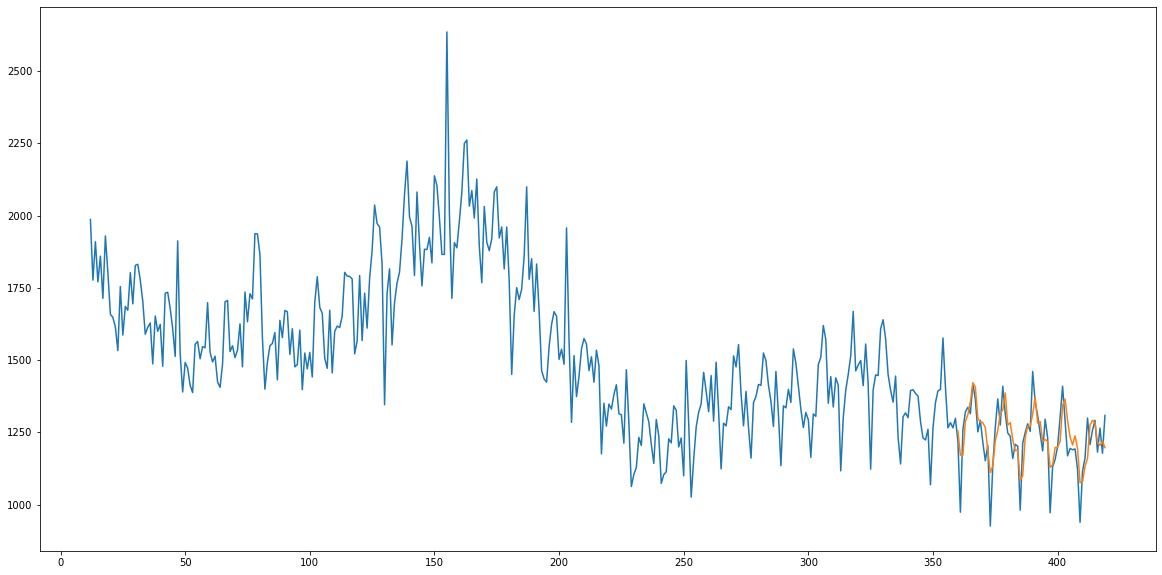

In [16]:
plt.figure(figsize=(20,10)) 
plt.plot(time_series['NumCases'])
plt.plot(time_series['NumCases_predict'][-60:])
plt.show()